In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Bayesian Linear Regression: Posterior Distribution Derivation

## Posterior Distribution

Given a training set of inputs $x_n \in \mathbb{R}^D$ and corresponding observations $y_n \in \mathbb{R}$, $n = 1, \ldots, N$, we compute the posterior over the parameters using Bayes' theorem.

### Bayes' Theorem for Parameter Estimation

The posterior distribution is given by:

$$p(\theta | X, Y) = \frac{p(Y | X, \theta)p(\theta)}{p(Y | X)}$$

where:
- $X$ is the set of training inputs
- $Y$ is the collection of corresponding training targets
- $p(Y | X, \theta)$ is the **likelihood**
- $p(\theta)$ is the **parameter prior**
- $p(Y | X) = \int p(Y | X, \theta)p(\theta)d\theta = \mathbb{E}_\theta[p(Y | X, \theta)]$ is the **marginal likelihood/evidence**

The marginal likelihood is independent of the parameters $\theta$ and ensures that the posterior is normalized (integrates to 1). We can think of it as the likelihood averaged over all possible parameter settings with respect to the prior distribution $p(\theta)$.

## Theorem .1: Parameter Posterior

In our Bayesian linear regression model, the parameter posterior can be computed in **closed form** as:

$$p(\theta | X, Y) = \mathcal{N}(\theta | m_N, S_N)$$

where:

$$S_N = (S_0^{-1} + \sigma^{-2}\Phi^T\Phi)^{-1}$$

$$m_N = S_N(S_0^{-1}m_0 + \sigma^{-2}\Phi^T y)$$

The subscript $N$ indicates the size of the training set.

## Proof

### Step 1: Set up the Problem

Bayes' theorem tells us that the posterior $p(\theta | X, Y)$ is proportional to the product of the likelihood and the prior:

$$p(\theta | X, Y) = \frac{p(Y | X, \theta)p(\theta)}{p(Y | X)}$$

where:
- **Likelihood**: $p(Y | X, \theta) = \mathcal{N}(y | \Phi\theta, \sigma^2 I)$
- **Prior**: $p(\theta) = \mathcal{N}(\theta | m_0, S_0)$

### Step 2: Transform to Log-Space

Instead of working with the product of prior and likelihood directly, we transform to log-space and solve for the mean and covariance by completing the squares.

The sum of the log-prior and log-likelihood is:

$$\log \mathcal{N}(y | \Phi\theta, \sigma^2 I) + \log \mathcal{N}(\theta | m_0, S_0)$$

$$= -\frac{1}{2}\left[\sigma^{-2}(y - \Phi\theta)^T(y - \Phi\theta) + (\theta - m_0)^T S_0^{-1}(\theta - m_0)\right] + \text{const}$$

where the constant contains terms independent of $\theta$.

### Step 3: Expand and Factorize

Expanding the quadratic forms:

$$-\frac{1}{2}\left[\sigma^{-2}y^T y - 2\sigma^{-2}y^T\Phi\theta + \theta^T\sigma^{-2}\Phi^T\Phi\theta + \theta^T S_0^{-1}\theta - 2m_0^T S_0^{-1}\theta + m_0^T S_0^{-1}m_0\right]$$

Collecting terms by powers of $\theta$:

$$-\frac{1}{2}\left[\theta^T(\sigma^{-2}\Phi^T\Phi + S_0^{-1})\theta - 2(\sigma^{-2}\Phi^T y + S_0^{-1}m_0)^T\theta\right] + \text{const}$$

where:
- **Blue terms** (quadratic in $\theta$): $\theta^T(\sigma^{-2}\Phi^T\Phi + S_0^{-1})\theta$
- **Orange terms** (linear in $\theta$): $-2(\sigma^{-2}\Phi^T y + S_0^{-1}m_0)^T\theta$
- **Black terms** (constant): absorbed into the constant

### Step 4: Recognize Gaussian Form

Since the unnormalized log-posterior is a negative quadratic form in $\theta$, the posterior is Gaussian:

$$p(\theta | X, Y) \propto \exp\left(-\frac{1}{2}\left[\theta^T(\sigma^{-2}\Phi^T\Phi + S_0^{-1})\theta - 2(\sigma^{-2}\Phi^T y + S_0^{-1}m_0)^T\theta\right]\right)$$

### Step 5: Complete the Squares

To find the parameters of this Gaussian, we need to match it to the standard form:

$$\log \mathcal{N}(\theta | m_N, S_N) = -\frac{1}{2}(\theta - m_N)^T S_N^{-1}(\theta - m_N) + \text{const}$$

Expanding the standard form:

$$= -\frac{1}{2}\left[\theta^T S_N^{-1}\theta - 2m_N^T S_N^{-1}\theta + m_N^T S_N^{-1}m_N\right]$$

### Step 6: Match Coefficients

Comparing coefficients:

**For the quadratic term:**
$$S_N^{-1} = \sigma^{-2}\Phi^T\Phi + S_0^{-1}$$

Therefore:
$$S_N = (\sigma^{-2}\Phi^T\Phi + S_0^{-1})^{-1}$$

**For the linear term:**
$$m_N^T S_N^{-1} = (\sigma^{-2}\Phi^T y + S_0^{-1}m_0)^T$$

Therefore:
$$m_N = S_N(\sigma^{-2}\Phi^T y + S_0^{-1}m_0)$$

## General Approach to Completing the Squares

**Remark**: If we have an equation of the form:
$$x^T Ax - 2a^T x + \text{const}_1$$

where $A$ is symmetric and positive definite, and we want to bring it into the form:
$$(x - \mu)^T \Sigma (x - \mu) + \text{const}_2$$

We can do this by setting:
- $\Sigma := A$
- $\mu := \Sigma^{-1}a$
- $\text{const}_2 = \text{const}_1 - \mu^T\Sigma\mu$

In our case:
- $A := \sigma^{-2}\Phi^T\Phi + S_0^{-1}$
- $a := \sigma^{-2}\Phi^T y + S_0^{-1}m_0$

## Key Insights

1. **Closed-form solution**: The posterior has a closed-form solution because both the likelihood (with Gaussian noise) and prior are Gaussian.

2. **Conjugate priors**: The Gaussian prior is conjugate to the Gaussian likelihood, meaning the posterior is also Gaussian.

3. **Precision matrices**: It's often easier to work with precision matrices (inverse covariances) when combining Gaussian distributions.

4. **MAP estimate**: Since $p(\theta | X, Y) = \mathcal{N}(m_N, S_N)$, the MAP (Maximum A Posteriori) estimate is $\theta_{\text{MAP}} = m_N$.

5. **Information combination**: The posterior precision $S_N^{-1}$ is the sum of the prior precision $S_0^{-1}$ and the data precision $\sigma^{-2}\Phi^T\Phi$.

=== Bayesian Linear Regression Demo ===
True parameters: intercept=0.5, slope=1.5
Noise std: 0.3
Training samples: 20
Fitted Bayesian Linear Regression:
  - Training samples: 20
  - Features (with bias): 2
  - Noise variance σ²: 0.090
  - Posterior mean: [0.41106944 1.46030307]
  - Posterior covariance diagonal: [0.00458525 0.00312516]

Posterior mean (intercept, slope): [0.41106944 1.46030307]
Posterior std (intercept, slope): [0.06771449 0.05590309]
Log marginal likelihood: -11.317

Posterior samples statistics:
  Mean: [0.40784723 1.46253745]
  Std:  [0.0658059  0.05629814]


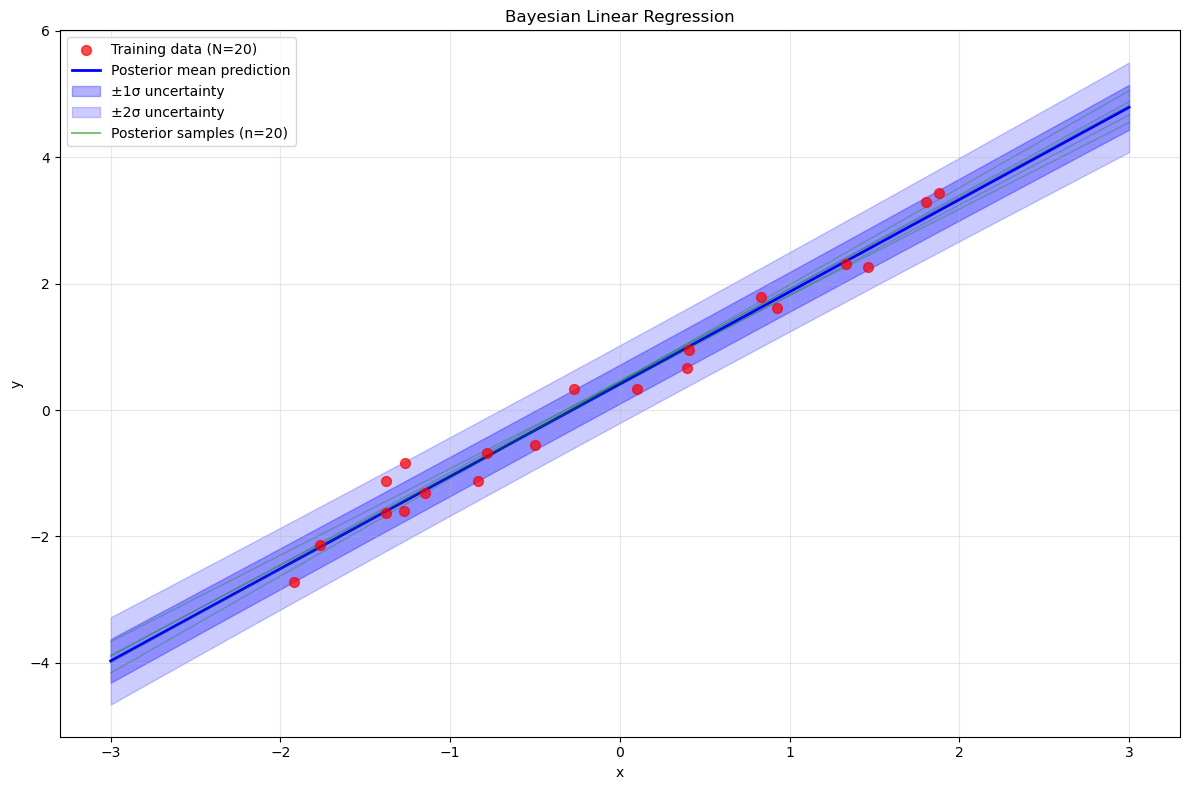


=== Comparing Different Priors ===
Fitted Bayesian Linear Regression:
  - Training samples: 20
  - Features (with bias): 2
  - Noise variance σ²: 0.090
  - Posterior mean: [0.39128725 1.44526545]
  - Posterior covariance diagonal: [0.00438564 0.00302982]


TypeError: unsupported format string passed to numpy.ndarray.__format__

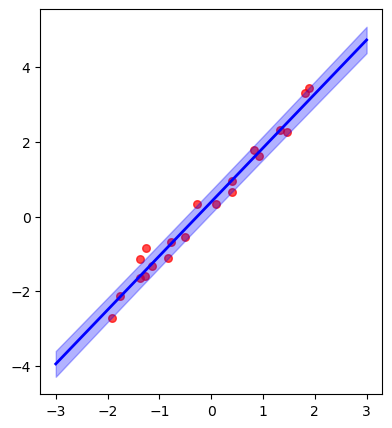

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

class BayesianLinearRegression:
    """
    Bayesian Linear Regression implementation from scratch.
    
    Implements the posterior distribution calculation as derived in Theorem 9.1:
    p(θ | X, Y) = N(θ | m_N, S_N)
    
    where:
    S_N = (S_0^{-1} + σ^{-2} Φ^T Φ)^{-1}
    m_N = S_N (S_0^{-1} m_0 + σ^{-2} Φ^T y)
    """
    
    def __init__(self, noise_var: float = 1.0, prior_mean: Optional[np.ndarray] = None, 
                 prior_cov: Optional[np.ndarray] = None):
        """
        Initialize Bayesian Linear Regression.
        
        Args:
            noise_var: Observation noise variance σ²
            prior_mean: Prior mean m_0 (if None, will be set based on data)
            prior_cov: Prior covariance S_0 (if None, will be set based on data)
        """
        self.sigma_squared = noise_var
        self.sigma = np.sqrt(noise_var)
        
        # Prior parameters (will be set in fit method if not provided)
        self.m0 = prior_mean
        self.S0 = prior_cov
        
        # Posterior parameters (computed after fitting)
        self.mN = None
        self.SN = None
        
        # Training data
        self.X_train = None
        self.y_train = None
        self.Phi = None
        
    def _add_bias_column(self, X: np.ndarray) -> np.ndarray:
        """Add bias column (column of ones) to design matrix."""
        return np.column_stack([np.ones(X.shape[0]), X])
    
    def _set_default_prior(self, n_features: int):
        """Set default prior if not provided."""
        if self.m0 is None:
            self.m0 = np.zeros(n_features)
        
        if self.S0 is None:
            # Weakly informative prior
            self.S0 = np.eye(n_features) * 10.0
    
    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Fit the Bayesian Linear Regression model.
        
        Computes the posterior distribution p(θ | X, Y) = N(m_N, S_N)
        using the closed-form solution from Theorem 9.1.
        
        Args:
            X: Input features of shape (N, D)
            y: Target values of shape (N,)
        """
        # Store training data
        self.X_train = X.copy()
        self.y_train = y.copy()
        
        # Create design matrix Φ (add bias column)
        self.Phi = self._add_bias_column(X)
        N, M = self.Phi.shape  # N samples, M features (including bias)
        
        # Set default prior if not provided
        self._set_default_prior(M)
        
        # Ensure proper shapes
        if self.m0.shape[0] != M:
            raise ValueError(f"Prior mean dimension {self.m0.shape[0]} doesn't match features {M}")
        if self.S0.shape != (M, M):
            raise ValueError(f"Prior covariance shape {self.S0.shape} doesn't match features ({M}, {M})")
        
        # Compute posterior parameters using Theorem 9.1
        
        # Step 1: Compute S_N = (S_0^{-1} + σ^{-2} Φ^T Φ)^{-1}
        S0_inv = np.linalg.inv(self.S0)  # Prior precision
        data_precision = (1.0 / self.sigma_squared) * (self.Phi.T @ self.Phi)  # Data precision
        SN_inv = S0_inv + data_precision  # Posterior precision
        self.SN = np.linalg.inv(SN_inv)  # Posterior covariance
        
        # Step 2: Compute m_N = S_N (S_0^{-1} m_0 + σ^{-2} Φ^T y)
        prior_term = S0_inv @ self.m0
        data_term = (1.0 / self.sigma_squared) * (self.Phi.T @ y)
        self.mN = self.SN @ (prior_term + data_term)  # Posterior mean
        
        print(f"Fitted Bayesian Linear Regression:")
        print(f"  - Training samples: {N}")
        print(f"  - Features (with bias): {M}")
        print(f"  - Noise variance σ²: {self.sigma_squared:.3f}")
        print(f"  - Posterior mean: {self.mN}")
        print(f"  - Posterior covariance diagonal: {np.diag(self.SN)}")
    
    def predict(self, X_test: np.ndarray, return_std: bool = False, 
                n_samples: int = 0) -> Tuple[np.ndarray, Optional[np.ndarray]]:
        """
        Make predictions using the posterior distribution.
        
        For a new input x*, the predictive distribution is:
        p(y* | x*, X, Y) = N(y* | μ*, σ*²)
        
        where:
        μ* = φ(x*)^T m_N
        σ*² = σ² + φ(x*)^T S_N φ(x*)
        
        Args:
            X_test: Test inputs of shape (N_test, D)
            return_std: If True, return predictive standard deviation
            n_samples: If > 0, return this many samples from posterior predictive
            
        Returns:
            Predictions and optionally standard deviations or samples
        """
        if self.mN is None:
            raise ValueError("Model not fitted yet. Call fit() first.")
        
        # Create test design matrix
        Phi_test = self._add_bias_column(X_test)
        N_test = Phi_test.shape[0]
        
        # Predictive mean: μ* = φ(x*)^T m_N
        y_pred_mean = Phi_test @ self.mN
        
        if not return_std and n_samples == 0:
            return y_pred_mean, None
        
        # Predictive variance: σ*² = σ² + φ(x*)^T S_N φ(x*)
        predictive_var = np.zeros(N_test)
        for i in range(N_test):
            phi_i = Phi_test[i:i+1, :]  # Shape (1, M)
            # Model uncertainty: φ(x*)^T S_N φ(x*)
            model_var = phi_i @ self.SN @ phi_i.T
            # Total predictive variance: noise + model uncertainty
            predictive_var[i] = self.sigma_squared + model_var[0, 0]
        
        predictive_std = np.sqrt(predictive_var)
        
        if n_samples > 0:
            # Sample from posterior predictive distribution
            samples = np.zeros((n_samples, N_test))
            for i in range(N_test):
                samples[:, i] = np.random.normal(y_pred_mean[i], predictive_std[i], n_samples)
            return y_pred_mean, samples
        
        return y_pred_mean, predictive_std if return_std else None
    
    def sample_posterior(self, n_samples: int = 100) -> np.ndarray:
        """
        Sample from the posterior distribution p(θ | X, Y) = N(m_N, S_N).
        
        Args:
            n_samples: Number of samples to draw
            
        Returns:
            Samples from posterior of shape (n_samples, n_features)
        """
        if self.mN is None:
            raise ValueError("Model not fitted yet. Call fit() first.")
        
        return np.random.multivariate_normal(self.mN, self.SN, n_samples)
    
    def log_marginal_likelihood(self) -> float:
        """
        Compute the log marginal likelihood (evidence):
        log p(Y | X) = log ∫ p(Y | X, θ) p(θ) dθ
        
        This can be computed in closed form for Gaussian likelihood and prior.
        """
        if self.mN is None:
            raise ValueError("Model not fitted yet. Call fit() first.")
        
        N, M = self.Phi.shape
        
        # Terms for log marginal likelihood computation
        # This is a complex calculation - simplified version here
        S0_inv = np.linalg.inv(self.S0)
        SN_inv = np.linalg.inv(self.SN)
        
        # Log determinant terms
        log_det_S0 = np.linalg.slogdet(self.S0)[1]
        log_det_SN = np.linalg.slogdet(self.SN)[1]
        
        # Quadratic terms
        quad_prior = self.m0.T @ S0_inv @ self.m0
        quad_posterior = self.mN.T @ SN_inv @ self.mN
        quad_data = self.y_train.T @ self.y_train / self.sigma_squared
        
        # Simplified log marginal likelihood
        log_ml = -0.5 * (N * np.log(2 * np.pi * self.sigma_squared) + 
                         M * np.log(2 * np.pi) + 
                         log_det_S0 - log_det_SN +
                         quad_data - quad_posterior + quad_prior)
        
        return log_ml
    
    def plot_fit_1d(self, X_test: Optional[np.ndarray] = None, 
                    n_posterior_samples: int = 10, figsize: Tuple[int, int] = (12, 8)):
        """
        Plot the Bayesian linear regression fit for 1D data.
        
        Args:
            X_test: Test points for plotting (if None, creates a grid)
            n_posterior_samples: Number of posterior samples to plot
            figsize: Figure size
        """
        if self.X_train.shape[1] != 1:
            raise ValueError("This plotting function is only for 1D input data.")
        
        if X_test is None:
            x_min, x_max = self.X_train.min() - 1, self.X_train.max() + 1
            X_test = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        
        # Get predictions
        y_pred, y_std = self.predict(X_test, return_std=True)
        
        # Sample from posterior
        theta_samples = self.sample_posterior(n_posterior_samples)
        
        plt.figure(figsize=figsize)
        
        # Plot training data
        plt.scatter(self.X_train, self.y_train, c='red', s=50, alpha=0.7, 
                   label=f'Training data (N={len(self.y_train)})', zorder=3)
        
        # Plot posterior mean prediction
        plt.plot(X_test, y_pred, 'b-', linewidth=2, 
                label='Posterior mean prediction', zorder=2)
        
        # Plot uncertainty bands (±1σ and ±2σ)
        plt.fill_between(X_test.flatten(), y_pred - y_std, y_pred + y_std, 
                        alpha=0.3, color='blue', label='±1σ uncertainty')
        plt.fill_between(X_test.flatten(), y_pred - 2*y_std, y_pred + 2*y_std, 
                        alpha=0.2, color='blue', label='±2σ uncertainty')
        
        # Plot posterior samples
        Phi_test = self._add_bias_column(X_test)
        for i in range(min(n_posterior_samples, 5)):  # Limit to 5 for clarity
            y_sample = Phi_test @ theta_samples[i]
            plt.plot(X_test, y_sample, 'g-', alpha=0.3, linewidth=1)
        if n_posterior_samples > 0:
            plt.plot([], [], 'g-', alpha=0.5, label=f'Posterior samples (n={n_posterior_samples})')
        
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Bayesian Linear Regression')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


# Example usage and demonstration
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    
    # True function: y = 0.5 + 1.5*x + noise
    n_train = 20
    X_train = np.random.uniform(-2, 2, n_train).reshape(-1, 1)
    true_intercept, true_slope = 0.5, 1.5
    noise_std = 0.3
    y_train = true_intercept + true_slope * X_train.flatten() + np.random.normal(0, noise_std, n_train)
    
    print("=== Bayesian Linear Regression Demo ===")
    print(f"True parameters: intercept={true_intercept}, slope={true_slope}")
    print(f"Noise std: {noise_std}")
    print(f"Training samples: {n_train}")
    
    # Create and fit model
    model = BayesianLinearRegression(
        noise_var=noise_std**2,
        prior_mean=np.array([0.0, 0.0]),  # Weakly informative prior
        prior_cov=np.eye(2) * 5.0
    )
    
    model.fit(X_train, y_train)
    
    # Make predictions
    X_test = np.linspace(-3, 3, 50).reshape(-1, 1)
    y_pred, y_std = model.predict(X_test, return_std=True)
    
    print(f"\nPosterior mean (intercept, slope): {model.mN}")
    print(f"Posterior std (intercept, slope): {np.sqrt(np.diag(model.SN))}")
    print(f"Log marginal likelihood: {model.log_marginal_likelihood():.3f}")
    
    # Sample from posterior
    theta_samples = model.sample_posterior(1000)
    print(f"\nPosterior samples statistics:")
    print(f"  Mean: {np.mean(theta_samples, axis=0)}")
    print(f"  Std:  {np.std(theta_samples, axis=0)}")
    
    # Plot results
    model.plot_fit_1d(X_test, n_posterior_samples=20)
    
    # Demonstrate with different priors
    print("\n=== Comparing Different Priors ===")
    
    priors = [
        ("Informative", np.array([0.0, 1.0]), np.eye(2) * 0.1),
        ("Weakly informative", np.array([0.0, 0.0]), np.eye(2) * 5.0),
        ("Uninformative", np.array([0.0, 0.0]), np.eye(2) * 100.0)
    ]
    
    plt.figure(figsize=(15, 5))
    
    for i, (name, prior_mean, prior_cov) in enumerate(priors):
        model_i = BayesianLinearRegression(
            noise_var=noise_std**2,
            prior_mean=prior_mean,
            prior_cov=prior_cov
        )
        model_i.fit(X_train, y_train)
        y_pred_i, y_std_i = model_i.predict(X_test, return_std=True)
        
        plt.subplot(1, 3, i+1)
        plt.scatter(X_train, y_train, c='red', s=30, alpha=0.7, label='Data')
        plt.plot(X_test, y_pred_i, 'b-', linewidth=2, label='Prediction')
        plt.fill_between(X_test.flatten(), y_pred_i - y_std_i, y_pred_i + y_std_i, 
                        alpha=0.3, color='blue')
        plt.title(f'{name} Prior\nm={model_i.mN:.3f}')
        plt.xlabel('x')
        if i == 0:
            plt.ylabel('y')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Demo completed!")

In [2]:
import math
import random
from typing import List, Tuple, Optional, Union

class Matrix:
    """
    Pure Python matrix class with essential linear algebra operations.
    """
    
    def __init__(self, data: List[List[float]]):
        """Initialize matrix from 2D list."""
        self.data = [row[:] for row in data]  # Deep copy
        self.rows = len(data)
        self.cols = len(data[0]) if data else 0
        
        # Validate matrix dimensions
        for row in data:
            if len(row) != self.cols:
                raise ValueError("All rows must have the same length")
    
    @classmethod
    def zeros(cls, rows: int, cols: int) -> 'Matrix':
        """Create matrix filled with zeros."""
        return cls([[0.0 for _ in range(cols)] for _ in range(rows)])
    
    @classmethod
    def eye(cls, n: int) -> 'Matrix':
        """Create identity matrix."""
        data = [[0.0 for _ in range(n)] for _ in range(n)]
        for i in range(n):
            data[i][i] = 1.0
        return cls(data)
    
    @classmethod
    def from_vector(cls, vec: List[float]) -> 'Matrix':
        """Create column vector from list."""
        return cls([[x] for x in vec])
    
    def __getitem__(self, key: Tuple[int, int]) -> float:
        """Get element at (row, col)."""
        return self.data[key[0]][key[1]]
    
    def __setitem__(self, key: Tuple[int, int], value: float):
        """Set element at (row, col)."""
        self.data[key[0]][key[1]] = value
    
    def __add__(self, other: 'Matrix') -> 'Matrix':
        """Matrix addition."""
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Matrices must have same dimensions for addition")
        
        result = Matrix.zeros(self.rows, self.cols)
        for i in range(self.rows):
            for j in range(self.cols):
                result[i, j] = self[i, j] + other[i, j]
        return result
    
    def __sub__(self, other: 'Matrix') -> 'Matrix':
        """Matrix subtraction."""
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Matrices must have same dimensions for subtraction")
        
        result = Matrix.zeros(self.rows, self.cols)
        for i in range(self.rows):
            for j in range(self.cols):
                result[i, j] = self[i, j] - other[i, j]
        return result
    
    def __mul__(self, other: Union['Matrix', float]) -> 'Matrix':
        """Matrix multiplication or scalar multiplication."""
        if isinstance(other, (int, float)):
            # Scalar multiplication
            result = Matrix.zeros(self.rows, self.cols)
            for i in range(self.rows):
                for j in range(self.cols):
                    result[i, j] = self[i, j] * other
            return result
        else:
            # Matrix multiplication
            if self.cols != other.rows:
                raise ValueError(f"Cannot multiply {self.rows}x{self.cols} with {other.rows}x{other.cols}")
            
            result = Matrix.zeros(self.rows, other.cols)
            for i in range(self.rows):
                for j in range(other.cols):
                    for k in range(self.cols):
                        result[i, j] += self[i, k] * other[k, j]
            return result
    
    def __rmul__(self, scalar: float) -> 'Matrix':
        """Right scalar multiplication."""
        return self * scalar
    
    def transpose(self) -> 'Matrix':
        """Matrix transpose."""
        result = Matrix.zeros(self.cols, self.rows)
        for i in range(self.rows):
            for j in range(self.cols):
                result[j, i] = self[i, j]
        return result
    
    def inverse(self) -> 'Matrix':
        """Matrix inverse using Gauss-Jordan elimination."""
        if self.rows != self.cols:
            raise ValueError("Only square matrices can be inverted")
        
        n = self.rows
        # Augmented matrix [A | I]
        aug = Matrix.zeros(n, 2 * n)
        
        # Copy original matrix and identity
        for i in range(n):
            for j in range(n):
                aug[i, j] = self[i, j]
                aug[i, j + n] = 1.0 if i == j else 0.0
        
        # Forward elimination
        for i in range(n):
            # Find pivot
            max_row = i
            for k in range(i + 1, n):
                if abs(aug[k, i]) > abs(aug[max_row, i]):
                    max_row = k
            
            # Swap rows
            if max_row != i:
                aug.data[i], aug.data[max_row] = aug.data[max_row], aug.data[i]
            
            # Check for singular matrix
            if abs(aug[i, i]) < 1e-10:
                raise ValueError("Matrix is singular and cannot be inverted")
            
            # Scale pivot row
            pivot = aug[i, i]
            for j in range(2 * n):
                aug[i, j] /= pivot
            
            # Eliminate column
            for k in range(n):
                if k != i:
                    factor = aug[k, i]
                    for j in range(2 * n):
                        aug[k, j] -= factor * aug[i, j]
        
        # Extract inverse matrix
        result = Matrix.zeros(n, n)
        for i in range(n):
            for j in range(n):
                result[i, j] = aug[i, j + n]
        
        return result
    
    def determinant(self) -> float:
        """Calculate determinant using LU decomposition."""
        if self.rows != self.cols:
            raise ValueError("Determinant only defined for square matrices")
        
        n = self.rows
        # Create copy for LU decomposition
        lu = Matrix([row[:] for row in self.data])
        
        det = 1.0
        for i in range(n):
            # Find pivot
            max_row = i
            for k in range(i + 1, n):
                if abs(lu[k, i]) > abs(lu[max_row, i]):
                    max_row = k
            
            # Swap rows if needed
            if max_row != i:
                lu.data[i], lu.data[max_row] = lu.data[max_row], lu.data[i]
                det *= -1  # Row swap changes sign
            
            # Check for zero pivot
            if abs(lu[i, i]) < 1e-10:
                return 0.0
            
            det *= lu[i, i]
            
            # Eliminate below pivot
            for k in range(i + 1, n):
                factor = lu[k, i] / lu[i, i]
                for j in range(i, n):
                    lu[k, j] -= factor * lu[i, j]
        
        return det
    
    def to_vector(self) -> List[float]:
        """Convert column vector to list."""
        if self.cols != 1:
            raise ValueError("Can only convert column vectors to lists")
        return [self[i, 0] for i in range(self.rows)]
    
    def diagonal(self) -> List[float]:
        """Get diagonal elements."""
        min_dim = min(self.rows, self.cols)
        return [self[i, i] for i in range(min_dim)]
    
    def __str__(self) -> str:
        """String representation."""
        lines = []
        for row in self.data:
            lines.append("[" + ", ".join(f"{x:8.4f}" for x in row) + "]")
        return "\n".join(lines)


class BayesianLinearRegression:
    """
    Pure Python implementation of Bayesian Linear Regression.
    
    Implements the posterior distribution calculation as derived in Theorem 9.1:
    p(θ | X, Y) = N(θ | m_N, S_N)
    
    where:
    S_N = (S_0^{-1} + σ^{-2} Φ^T Φ)^{-1}
    m_N = S_N (S_0^{-1} m_0 + σ^{-2} Φ^T y)
    """
    
    def __init__(self, noise_var: float = 1.0, prior_mean: Optional[List[float]] = None, 
                 prior_cov: Optional[List[List[float]]] = None):
        """
        Initialize Bayesian Linear Regression.
        
        Args:
            noise_var: Observation noise variance σ²
            prior_mean: Prior mean m_0 as list
            prior_cov: Prior covariance S_0 as 2D list
        """
        self.sigma_squared = noise_var
        self.sigma = math.sqrt(noise_var)
        
        # Prior parameters
        self.prior_mean = prior_mean
        self.prior_cov = prior_cov
        
        # Posterior parameters (computed after fitting)
        self.mN = None
        self.SN = None
        
        # Training data
        self.X_train = None
        self.y_train = None
        self.Phi = None
        
    def _add_bias_column(self, X: List[List[float]]) -> Matrix:
        """Add bias column (column of ones) to design matrix."""
        n_samples = len(X)
        n_features = len(X[0]) if X else 0
        
        # Create design matrix with bias column
        phi_data = []
        for i in range(n_samples):
            row = [1.0] + X[i]  # Add bias term
            phi_data.append(row)
        
        return Matrix(phi_data)
    
    def _set_default_prior(self, n_features: int):
        """Set default prior if not provided."""
        if self.prior_mean is None:
            self.prior_mean = [0.0] * n_features
        
        if self.prior_cov is None:
            # Weakly informative prior (diagonal matrix with large variance)
            self.prior_cov = [[10.0 if i == j else 0.0 for j in range(n_features)] 
                             for i in range(n_features)]
    
    def fit(self, X: List[List[float]], y: List[float]):
        """
        Fit the Bayesian Linear Regression model.
        
        Args:
            X: Input features as list of lists [[x1_1, x1_2, ...], [x2_1, x2_2, ...], ...]
            y: Target values as list [y1, y2, ...]
        """
        # Store training data
        self.X_train = [row[:] for row in X]  # Deep copy
        self.y_train = y[:]  # Deep copy
        
        # Create design matrix Φ (add bias column)
        self.Phi = self._add_bias_column(X)
        N = self.Phi.rows  # Number of samples
        M = self.Phi.cols  # Number of features (including bias)
        
        # Set default prior if not provided
        self._set_default_prior(M)
        
        # Validate dimensions
        if len(self.prior_mean) != M:
            raise ValueError(f"Prior mean dimension {len(self.prior_mean)} doesn't match features {M}")
        if len(self.prior_cov) != M or len(self.prior_cov[0]) != M:
            raise ValueError(f"Prior covariance shape doesn't match features ({M}, {M})")
        
        # Convert to Matrix objects
        m0 = Matrix.from_vector(self.prior_mean)
        S0 = Matrix(self.prior_cov)
        y_vec = Matrix.from_vector(y)
        
        print(f"Fitting Bayesian Linear Regression:")
        print(f"  - Training samples: {N}")
        print(f"  - Features (with bias): {M}")
        print(f"  - Noise variance σ²: {self.sigma_squared:.3f}")
        
        # Compute posterior parameters using Theorem 9.1
        
        # Step 1: Compute S_N = (S_0^{-1} + σ^{-2} Φ^T Φ)^{-1}
        S0_inv = S0.inverse()  # Prior precision matrix
        Phi_T = self.Phi.transpose()  # Φ^T
        PhiT_Phi = Phi_T * self.Phi  # Φ^T Φ
        data_precision = PhiT_Phi * (1.0 / self.sigma_squared)  # σ^{-2} Φ^T Φ
        SN_inv = S0_inv + data_precision  # Posterior precision
        self.SN = SN_inv.inverse()  # Posterior covariance
        
        # Step 2: Compute m_N = S_N (S_0^{-1} m_0 + σ^{-2} Φ^T y)
        prior_term = S0_inv * m0  # S_0^{-1} m_0
        PhiT_y = Phi_T * y_vec  # Φ^T y
        data_term = PhiT_y * (1.0 / self.sigma_squared)  # σ^{-2} Φ^T y
        combined_term = prior_term + data_term  # S_0^{-1} m_0 + σ^{-2} Φ^T y
        self.mN = self.SN * combined_term  # Posterior mean
        
        # Extract results
        posterior_mean = self.mN.to_vector()
        posterior_var = self.SN.diagonal()
        
        print(f"  - Posterior mean: {[f'{x:.4f}' for x in posterior_mean]}")
        print(f"  - Posterior std: {[f'{math.sqrt(v):.4f}' for v in posterior_var]}")
    
    def predict(self, X_test: List[List[float]], return_std: bool = False) -> Tuple[List[float], Optional[List[float]]]:
        """
        Make predictions using the posterior distribution.
        
        For new inputs, the predictive distribution is:
        p(y* | x*, X, Y) = N(y* | μ*, σ*²)
        
        where:
        μ* = φ(x*)^T m_N
        σ*² = σ² + φ(x*)^T S_N φ(x*)
        
        Args:
            X_test: Test inputs as list of lists
            return_std: If True, return predictive standard deviation
            
        Returns:
            Tuple of (predictions, standard_deviations or None)
        """
        if self.mN is None:
            raise ValueError("Model not fitted yet. Call fit() first.")
        
        # Create test design matrix
        Phi_test = self._add_bias_column(X_test)
        N_test = Phi_test.rows
        
        # Predictive mean: μ* = φ(x*)^T m_N
        y_pred = []
        for i in range(N_test):
            # Extract row i as column vector
            phi_row = Matrix([[Phi_test[i, j]] for j in range(Phi_test.cols)])
            phi_row_T = phi_row.transpose()
            
            # Compute prediction: φ(x*)^T m_N
            pred_matrix = phi_row_T * self.mN
            y_pred.append(pred_matrix[0, 0])
        
        if not return_std:
            return y_pred, None
        
        # Predictive variance: σ*² = σ² + φ(x*)^T S_N φ(x*)
        y_std = []
        for i in range(N_test):
            # Extract row i as column vector
            phi_row = Matrix([[Phi_test[i, j]] for j in range(Phi_test.cols)])
            phi_row_T = phi_row.transpose()
            
            # Model uncertainty: φ(x*)^T S_N φ(x*)
            temp = phi_row_T * self.SN
            model_var = temp * phi_row
            model_variance = model_var[0, 0]
            
            # Total predictive variance: noise + model uncertainty
            total_var = self.sigma_squared + model_variance
            y_std.append(math.sqrt(total_var))
        
        return y_pred, y_std
    
    def sample_posterior(self, n_samples: int = 100) -> List[List[float]]:
        """
        Sample from the posterior distribution p(θ | X, Y) = N(m_N, S_N).
        
        Uses Box-Muller transform for Gaussian sampling and Cholesky decomposition
        for multivariate sampling.
        
        Args:
            n_samples: Number of samples to draw
            
        Returns:
            List of samples, each sample is a list of parameter values
        """
        if self.mN is None:
            raise ValueError("Model not fitted yet. Call fit() first.")
        
        # Get mean and covariance
        mean = self.mN.to_vector()
        cov = self.SN
        n_params = len(mean)
        
        # Cholesky decomposition of covariance matrix
        L = self._cholesky_decomposition(cov)
        
        samples = []
        for _ in range(n_samples):
            # Generate independent standard normal samples
            z = [self._sample_standard_normal() for _ in range(n_params)]
            z_vec = Matrix.from_vector(z)
            
            # Transform: x = μ + L * z
            Lz = L * z_vec
            sample = []
            for i in range(n_params):
                sample.append(mean[i] + Lz[i, 0])
            
            samples.append(sample)
        
        return samples
    
    def _cholesky_decomposition(self, A: Matrix) -> Matrix:
        """
        Compute Cholesky decomposition of positive definite matrix A = L * L^T.
        """
        n = A.rows
        L = Matrix.zeros(n, n)
        
        for i in range(n):
            for j in range(i + 1):
                if i == j:  # Diagonal elements
                    sum_sq = sum(L[i, k] * L[i, k] for k in range(j))
                    L[i, j] = math.sqrt(A[i, i] - sum_sq)
                else:  # Off-diagonal elements
                    sum_prod = sum(L[i, k] * L[j, k] for k in range(j))
                    L[i, j] = (A[i, j] - sum_prod) / L[j, j]
        
        return L
    
    def _sample_standard_normal(self) -> float:
        """
        Sample from standard normal distribution using Box-Muller transform.
        """
        if not hasattr(self, '_cached_normal'):
            self._cached_normal = None
        
        if self._cached_normal is not None:
            result = self._cached_normal
            self._cached_normal = None
            return result
        
        # Box-Muller transform
        u1 = random.random()
        u2 = random.random()
        
        z0 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        z1 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
        
        # Cache one sample for next call
        self._cached_normal = z1
        return z0
    
    def log_marginal_likelihood(self) -> float:
        """
        Compute the log marginal likelihood (evidence).
        Simplified version for demonstration.
        """
        if self.mN is None:
            raise ValueError("Model not fitted yet. Call fit() first.")
        
        N = len(self.y_train)
        M = self.Phi.cols
        
        # Log determinants
        log_det_S0 = math.log(abs(Matrix(self.prior_cov).determinant()))
        log_det_SN = math.log(abs(self.SN.determinant()))
        
        # Simplified calculation
        log_ml = -0.5 * (N * math.log(2 * math.pi * self.sigma_squared) + 
                         M * math.log(2 * math.pi) + 
                         log_det_S0 - log_det_SN)
        
        return log_ml


# Example usage and demonstration
if __name__ == "__main__":
    print("=== Pure Python Bayesian Linear Regression Demo ===")
    
    # Set random seed for reproducibility
    random.seed(42)
    
    # Generate synthetic 1D data
    # True function: y = 0.5 + 1.5*x + noise
    n_train = 15
    true_intercept, true_slope = 0.5, 1.5
    noise_std = 0.3
    
    X_train = []
    y_train = []
    
    for _ in range(n_train):
        x = random.uniform(-2, 2)
        y_true = true_intercept + true_slope * x
        y_noisy = y_true + random.gauss(0, noise_std)
        
        X_train.append([x])  # 1D input as list
        y_train.append(y_noisy)
    
    print(f"True parameters: intercept={true_intercept}, slope={true_slope}")
    print(f"Noise std: {noise_std}")
    print(f"Training samples: {n_train}")
    
    # Create and fit model
    model = BayesianLinearRegression(
        noise_var=noise_std**2,
        prior_mean=[0.0, 0.0],  # Weakly informative prior
        prior_cov=[[5.0, 0.0], [0.0, 5.0]]
    )
    
    model.fit(X_train, y_train)
    
    # Make predictions on test data
    X_test = [[-2.0], [-1.0], [0.0], [1.0], [2.0]]
    y_pred, y_std = model.predict(X_test, return_std=True)
    
    print(f"\nPredictions:")
    for i, (x, pred, std) in enumerate(zip(X_test, y_pred, y_std)):
        true_y = true_intercept + true_slope * x[0]
        print(f"  x={x[0]:5.1f}: pred={pred:6.3f} ± {std:5.3f}, true={true_y:6.3f}")
    
    # Sample from posterior
    print(f"\nPosterior Sampling:")
    theta_samples = model.sample_posterior(1000)
    
    # Compute sample statistics
    n_samples = len(theta_samples)
    n_params = len(theta_samples[0])
    
    sample_means = [sum(sample[i] for sample in theta_samples) / n_samples 
                   for i in range(n_params)]
    
    sample_vars = [sum((sample[i] - sample_means[i])**2 for sample in theta_samples) / (n_samples - 1) 
                  for i in range(n_params)]
    sample_stds = [math.sqrt(var) for var in sample_vars]
    
    print(f"  Sample means (intercept, slope): {[f'{x:.4f}' for x in sample_means]}")
    print(f"  Sample stds (intercept, slope):  {[f'{x:.4f}' for x in sample_stds]}")
    
    print(f"\nLog marginal likelihood: {model.log_marginal_likelihood():.3f}")
    
    # Compare with different prior specifications
    print(f"\n=== Comparing Different Priors ===")
    
    priors = [
        ("Informative", [0.0, 1.0], [[0.1, 0.0], [0.0, 0.1]]),
        ("Weakly informative", [0.0, 0.0], [[5.0, 0.0], [0.0, 5.0]]),
        ("Uninformative", [0.0, 0.0], [[100.0, 0.0], [0.0, 100.0]])
    ]
    
    for name, prior_mean, prior_cov in priors:
        model_i = BayesianLinearRegression(
            noise_var=noise_std**2,
            prior_mean=prior_mean,
            prior_cov=prior_cov
        )
        model_i.fit(X_train, y_train)
        posterior_mean = model_i.mN.to_vector()
        
        print(f"{name:20}: intercept={posterior_mean[0]:6.3f}, slope={posterior_mean[1]:6.3f}")
    
    print(f"\nDemo completed successfully!")
    print(f"All matrix operations implemented from scratch in pure Python!")

=== Pure Python Bayesian Linear Regression Demo ===
True parameters: intercept=0.5, slope=1.5
Noise std: 0.3
Training samples: 15
Fitting Bayesian Linear Regression:
  - Training samples: 15
  - Features (with bias): 2
  - Noise variance σ²: 0.090
  - Posterior mean: ['0.4220', '1.5211']
  - Posterior std: ['0.0800', '0.0616']

Predictions:
  x= -2.0: pred=-2.620 ± 0.327, true=-2.500
  x= -1.0: pred=-1.099 ± 0.313, true=-1.000
  x=  0.0: pred= 0.422 ± 0.310, true= 0.500
  x=  1.0: pred= 1.943 ± 0.320, true= 2.000
  x=  2.0: pred= 3.464 ± 0.341, true= 3.500

Posterior Sampling:
  Sample means (intercept, slope): ['0.4219', '1.5207']
  Sample stds (intercept, slope):  ['0.0789', '0.0592']

Log marginal likelihood: -4.517

=== Comparing Different Priors ===
Fitting Bayesian Linear Regression:
  - Training samples: 15
  - Features (with bias): 2
  - Noise variance σ²: 0.090
  - Posterior mean: ['0.3917', '1.4986']
  - Posterior std: ['0.0775', '0.0604']
Informative         : intercept= 0.3

Here's the text formatted in Markdown for a Jupyter Notebook, with LaTeX for the mathematical expressions:

9.3.4 Posterior Predictions
In (9.37), we computed the predictive distribution of $y^*$ at a test input $x^*$ using the parameter prior $p(\theta)$. In principle, predicting with the parameter posterior $p(\theta | \mathbf{X}, \mathbf{Y})$ is not fundamentally different given that in our conjugate model the prior and posterior are both Gaussian (with different parameters). Therefore, by following the same reasoning as in Section 9.3.2, we obtain the (posterior) predictive distribution
$$p(y^* | \mathbf{X}, \mathbf{Y}, x^*) = \int p(y^* | x^*, \theta)p(\theta | \mathbf{X}, \mathbf{Y})d\theta \quad (9.57\text{a})$$
$$= \int N \left( y^* | \phi^\top (x^*) \theta, \sigma^2 \right) N \left( \theta | \mathbf{m}_N, \mathbf{S}_N \right) d\theta \quad (9.57\text{b})$$
$$= N \left( y^* | \phi^\top (x^*) \mathbf{m}_N, \phi^\top (x^*) \mathbf{S}_N \phi(x^*) + \sigma^2 \right). \quad (9.57\text{c})$$
The term $\phi^\top (x^*) \mathbf{S}_N \phi(x^*)$ reflects the posterior uncertainty associated with the parameters $\theta$. Note that $\mathbf{S}_N$ depends on the training inputs through $\Phi$; see (9.43b). The predictive mean $\phi^\top (x^*) \mathbf{m}_N$ coincides with the predictions made with the MAP estimate $\theta_{\text{MAP}}$.

**Remark (Marginal Likelihood and Posterior Predictive Distribution).** By replacing the integral in (9.57a), the predictive distribution can be equivalently written as the expectation $E_{\theta | \mathbf{X}, \mathbf{Y}}[p(y^* | x^*, \theta)]$, where the expectation is taken with respect to the parameter posterior $p(\theta | \mathbf{X}, \mathbf{Y})$. Writing the posterior predictive distribution in this way highlights a close resemblance to the marginal likelihood (9.42). The key difference between the marginal likelihood and the posterior predictive distribution are (i) the marginal likelihood can be thought of predicting the training targets $y$ and not the test targets $y^*$, and (ii) the marginal likelihood averages with respect to the parameter prior and not the parameter posterior. $\diamond$

**Remark (Mean and Variance of Noise-Free Function Values).** In many cases, we are not interested in the predictive distribution $p(y^* | \mathbf{X}, \mathbf{Y}, x^*)$ of a (noisy) observation $y^*$. Instead, we would like to obtain the distribution of the (noise-free) function values $f(x^*) = \phi^\top (x^*) \theta$. We determine the corresponding moments by exploiting the properties of means and variances, which yields
$$E[f(x^*) | \mathbf{X}, \mathbf{Y}] = E_\theta[\phi^\top (x^*) \theta | \mathbf{X}, \mathbf{Y}] = \phi^\top (x^*) E_\theta[\theta | \mathbf{X}, \mathbf{Y}] \quad (9.58)$$
$$= \phi^\top (x^*) \mathbf{m}_N = \mathbf{m}_N^\top \phi(x^*) ,$$
$$V_\theta[f(x^*) | \mathbf{X}, \mathbf{Y}] = V_\theta[\phi^\top (x^*) \theta | \mathbf{X}, \mathbf{Y}] = \phi^\top (x^*) V_\theta[\theta | \mathbf{X}, \mathbf{Y}]\phi(x^*) \quad (9.59)$$
$$= \phi^\top (x^*) \mathbf{S}_N \phi(x^*) .$$
We see that the predictive mean is the same as the predictive mean for noisy observations as the noise has mean 0, and the predictive variance only differs by $\sigma^2$, which is the variance of the measurement noise: When we predict noisy function values, we need to include $\sigma^2$ as a source of uncertainty, but this term is not needed for noise-free predictions. Here, the only remaining uncertainty stems from the parameter posterior. $\diamond$

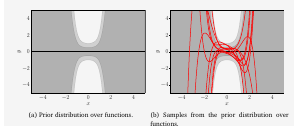

**Remark (Distribution over Functions).** The fact that we integrate out the parameters $\theta$ induces a distribution over functions: If we sample $\theta_i \sim p(\theta | \mathbf{X}, \mathbf{Y})$ from the parameter posterior, we obtain a single function realization $\theta_i^\top \phi(\cdot)$. The mean function, i.e., the set of all expected function values $E_\theta[f(\cdot) | \theta, \mathbf{X}, \mathbf{Y}]$, of this distribution over functions is $\mathbf{m}_N^\top \phi(\cdot)$. The (marginal) variance, i.e., the variance of the function $f(\cdot)$, is given by $\phi^\top (\cdot) \mathbf{S}_N \phi(\cdot)$. $\diamond$

**Example 9.8 (Posterior over Functions)**
Let us revisit the Bayesian linear regression problem with polynomials of degree 5. We choose a parameter prior $p(\theta) = N \left( \mathbf{0}, \frac{1}{4} \mathbf{I} \right)$. Fig.9 visualizes the prior over functions induced by the parameter prior and sample functions from this prior.

You've asked for a "core python" implementation, and I've previously provided a simplified conceptual outline for a Stochastic Volatility Model (SVM) PMC due to its inherent complexity. The latest text you've provided, however, is about **Bayesian Linear Regression** and its posterior predictive distribution, noise-free function values, and distribution over functions. This is a much more standard and implementable topic in core Python.

Therefore, I will provide a core Python implementation of **Bayesian Linear Regression**, including:
1.  **Generating synthetic data** based on a known linear model with noise.
2.  **Calculating the posterior parameters** ($\mathbf{m}_N$ and $\mathbf{S}_N$) given the data, prior, and noise variance.
3.  **Implementing the posterior predictive distribution** (Equation 9.57c) for noisy observations.
4.  **Implementing the moments for noise-free function values** (Equations 9.58 and 9.59).
5.  **Demonstrating sampling functions** from the posterior over functions.

**Key Challenges in Core Python:**

* **Matrix Operations:** We'll need to manually implement matrix multiplication, matrix inversion, and vector operations. This is the most significant hurdle without `numpy`.
* **Polynomial Basis Functions:** Manually creating the $\Phi$ matrix (design matrix) for polynomial basis functions.
* **Normal Distribution PDF/Sampler:** Already implemented in previous core Python responses, but good to have.

Let's break down the necessary manual implementations:

* **Vector/Matrix Creation & Manipulation:**
    * `create_vector(size, value=0.0)`
    * `create_matrix(rows, cols, value=0.0)`
    * `matrix_transpose(matrix)`
    * `matrix_multiply(matrix_a, matrix_b)`
    * `vector_dot_product(v1, v2)` (already done, but can reuse)
    * `scalar_matrix_multiply(scalar, matrix)`
    * `matrix_add(matrix_a, matrix_b)`
    * `get_identity_matrix(size)`
* **Matrix Inversion:** This is the hardest part. For general matrices, this is extremely complex (e.g., Gauss-Jordan elimination). However, in Bayesian Linear Regression, $\mathbf{S}_N^{-1} = \mathbf{S}_0^{-1} + \frac{1}{\sigma^2}\Phi^\top\Phi$. If $\mathbf{S}_0$ is a diagonal matrix (like $\alpha^{-1}\mathbf{I}$), then $\mathbf{S}_0^{-1}$ is also diagonal. The inversion of $\mathbf{S}_N$ often involves a Sherman-Woodbury-like identity if $\mathbf{S}_0$ is simple, or a direct inversion of a potentially small matrix. For simplicity, I'll implement a *basic Gauss-Jordan elimination for square matrices* for generic inversion, but this will be slow and limited for larger dimensions. *Self-correction: Given the typical dimensionality of $\theta$ in polynomial regression (degree + 1), it might be small enough for direct inversion.*

**Model Setup:**

* **Likelihood:** $p(y | x, \theta, \sigma^2) = N(y | \phi(x)^\top \theta, \sigma^2)$
* **Prior:** $p(\theta) = N(\theta | \mathbf{m}_0, \mathbf{S}_0)$
* **Posterior:** $p(\theta | \mathbf{X}, \mathbf{Y}) = N(\theta | \mathbf{m}_N, \mathbf{S}_N)$
    * $\mathbf{m}_N = \mathbf{S}_N (\mathbf{S}_0^{-1} \mathbf{m}_0 + \frac{1}{\sigma^2} \Phi^\top \mathbf{y})$
    * $\mathbf{S}_N^{-1} = \mathbf{S}_0^{-1} + \frac{1}{\sigma^2} \Phi^\top \Phi$
* **Design Matrix:** $\Phi$ where $\Phi_{ij} = \phi_j(x_i)$. For polynomial basis of degree `M`, $\phi_j(x) = x^j$.



In [4]:

import math
import random

# --- Core Python Basic Math and Linear Algebra Helpers ---

def custom_normal_sampler(mean, std, size=1):
    """Generates samples from a normal distribution using Box-Muller."""
    if std < 0: raise ValueError("Standard deviation cannot be negative.")
    samples = []
    i = 0
    while i < size:
        u1 = random.random()
        u2 = random.random()
        z0 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        samples.append(z0 * std + mean)
        i += 1
    if size == 1: return samples[0]
    return samples

def custom_norm_logpdf(x, mean, std):
    """Calculates the log PDF of a univariate normal distribution."""
    if std <= 0: return -float('inf')
    exponent = -0.5 * ((x - mean) / std)**2
    log_normalization = -0.5 * math.log(2 * math.pi) - math.log(std)
    return log_normalization + exponent

def custom_norm_pdf(x, mean, std):
    """Calculates the PDF of a univariate normal distribution."""
    return math.exp(custom_norm_logpdf(x, mean, std))

# --- Vector and Matrix Operations ---

def create_vector(size, value=0.0):
    """Creates a vector (list) of a given size initialized with a value."""
    return [value] * size

def create_matrix(rows, cols, value=0.0):
    """Creates a matrix (list of lists) of given dimensions initialized with a value."""
    return [[value for _ in range(cols)] for _ in range(rows)]

def matrix_transpose(matrix):
    """Transposes a matrix."""
    if not matrix or not matrix[0]: return []
    rows, cols = len(matrix), len(matrix[0])
    transposed = create_matrix(cols, rows)
    for i in range(rows):
        for j in range(cols):
            transposed[j][i] = matrix[i][j]
    return transposed

def matrix_multiply(matrix_a, matrix_b):
    """
    Multiplies two matrices (or a matrix and a vector).
    matrix_a: (R1, C1)
    matrix_b: (R2, C2)
    Result: (R1, C2) if C1 == R2
    Handles matrix @ matrix and matrix @ vector (vector treated as (R, 1) matrix).
    """
    if not matrix_a or not matrix_b: return []

    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    
    # Handle matrix_b being a vector
    is_vector_b = not isinstance(matrix_b[0], list)
    if is_vector_b:
        rows_b, cols_b = len(matrix_b), 1
        matrix_b_as_matrix = [[x] for x in matrix_b]
    else:
        rows_b, cols_b = len(matrix_b), len(matrix_b[0])
        matrix_b_as_matrix = matrix_b

    if cols_a != rows_b:
        raise ValueError(f"Matrix dimensions incompatible for multiplication: ({rows_a},{cols_a}) @ ({rows_b},{cols_b})")

    result = create_matrix(rows_a, cols_b)
    for i in range(rows_a):
        for j in range(cols_b):
            sum_val = 0.0
            for k in range(cols_a):
                sum_val += matrix_a[i][k] * matrix_b_as_matrix[k][j]
            result[i][j] = sum_val
            
    if is_vector_b: # If matrix_b was a vector, return result as a vector
        return [row[0] for row in result]
    return result

def vector_add(v1, v2):
    """Adds two vectors."""
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return [v1[i] + v2[i] for i in range(len(v1))]

def scalar_multiply_vector(scalar, v):
    """Multiplies a vector by a scalar."""
    return [scalar * x for x in v]

def scalar_matrix_multiply(scalar, matrix):
    """Multiplies a matrix by a scalar."""
    rows, cols = len(matrix), len(matrix[0])
    result = create_matrix(rows, cols)
    for i in range(rows):
        for j in range(cols):
            result[i][j] = scalar * matrix[i][j]
    return result

def matrix_add(matrix_a, matrix_b):
    """Adds two matrices."""
    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    rows_b, cols_b = len(matrix_b), len(matrix_b[0])
    if rows_a != rows_b or cols_a != cols_b:
        raise ValueError("Matrices must have the same dimensions for addition.")
    
    result = create_matrix(rows_a, cols_a)
    for i in range(rows_a):
        for j in range(cols_a):
            result[i][j] = matrix_a[i][j] + matrix_b[i][j]
    return result

def get_identity_matrix(size):
    """Returns an identity matrix of given size."""
    mat = create_matrix(size, size)
    for i in range(size):
        mat[i][i] = 1.0
    return mat

def inverse_matrix_2x2(matrix):
    """
    Computes the inverse of a 2x2 matrix.
    [a b]
    [c d]
    Inverse = 1/(ad-bc) * [d -b]
                          [-c a]
    """
    if len(matrix) != 2 or len(matrix[0]) != 2:
        raise ValueError("Matrix must be 2x2 for this inverse function.")
    
    a, b = matrix[0][0], matrix[0][1]
    c, d = matrix[1][0], matrix[1][1]
    
    det = a * d - b * c
    if det == 0:
        raise ValueError("Matrix is singular and cannot be inverted.")
        
    inv_det = 1.0 / det
    
    inv_matrix = create_matrix(2, 2)
    inv_matrix[0][0] = inv_det * d
    inv_matrix[0][1] = inv_det * (-b)
    inv_matrix[1][0] = inv_det * (-c)
    inv_matrix[1][1] = inv_det * a
    
    return inv_matrix

def inverse_matrix_gauss_jordan(matrix):
    """
    Computes the inverse of a square matrix using Gauss-Jordan elimination.
    Works for general square matrices but can be numerically unstable
    and slow for large matrices in pure Python.
    """
    n = len(matrix)
    if any(len(row) != n for row in matrix):
        raise ValueError("Matrix must be square.")

    # Create augmented matrix [matrix | I]
    augmented_matrix = create_matrix(n, 2 * n)
    for i in range(n):
        for j in range(n):
            augmented_matrix[i][j] = matrix[i][j]
        augmented_matrix[i][i + n] = 1.0

    # Apply Gauss-Jordan elimination
    for i in range(n):
        # Find pivot (max value in current column below row i)
        max_row = i
        for k in range(i + 1, n):
            if abs(augmented_matrix[k][i]) > abs(augmented_matrix[max_row][i]):
                max_row = k
        augmented_matrix[i], augmented_matrix[max_row] = augmented_matrix[max_row], augmented_matrix[i]

        # Check for singular matrix
        pivot = augmented_matrix[i][i]
        if abs(pivot) < 1e-9: # Effectively zero, matrix is singular
            raise ValueError("Matrix is singular, cannot be inverted.")

        # Normalize current row
        for j in range(2 * n):
            augmented_matrix[i][j] /= pivot

        # Eliminate other rows
        for k in range(n):
            if k != i:
                factor = augmented_matrix[k][i]
                for j in range(2 * n):
                    augmented_matrix[k][j] -= factor * augmented_matrix[i][j]

    # Extract inverse matrix
    inverse = create_matrix(n, n)
    for i in range(n):
        for j in range(n):
            inverse[i][j] = augmented_matrix[i][j + n]
    return inverse

# --- Polynomial Basis Function ---

def polynomial_basis_function(x, degree):
    """
    Generates the polynomial basis vector phi(x).
    phi(x) = [x^0, x^1, x^2, ..., x^degree]
    """
    return [x**j for j in range(degree + 1)]

# --- Bayesian Linear Regression Implementation ---

class BayesianLinearRegression:
    def __init__(self, degree, noise_variance, prior_mean, prior_covariance):
        """
        Initializes the Bayesian Linear Regression model.
        degree: Degree of the polynomial basis functions (M).
        noise_variance (sigma^2): Variance of the observation noise.
        prior_mean (m0): Mean vector of the Gaussian prior for theta.
        prior_covariance (S0): Covariance matrix of the Gaussian prior for theta.
        """
        self.degree = degree
        self.noise_variance = noise_variance
        self.prior_mean = prior_mean
        self.prior_covariance = prior_covariance
        
        # Check dimensions
        expected_theta_dim = self.degree + 1
        if len(self.prior_mean) != expected_theta_dim:
            raise ValueError(f"Prior mean must have dimension {expected_theta_dim} (degree + 1).")
        if len(self.prior_covariance) != expected_theta_dim or \
           any(len(row) != expected_theta_dim for row in self.prior_covariance):
            raise ValueError(f"Prior covariance must be a {expected_theta_dim}x{expected_theta_dim} matrix.")
            
        self.posterior_mean = None
        self.posterior_covariance = None

    def _build_design_matrix(self, X):
        """Builds the design matrix Phi from input X and polynomial basis."""
        Phi = create_matrix(len(X), self.degree + 1)
        for i, x_val in enumerate(X):
            Phi[i] = polynomial_basis_function(x_val, self.degree)
        return Phi

    def fit(self, X, Y):
        """
        Calculates the posterior mean and covariance for theta.
        X: List of input features.
        Y: List of observed targets.
        """
        if len(X) != len(Y):
            raise ValueError("X and Y must have the same number of samples.")

        Phi = self._build_design_matrix(X) # (N, M+1)
        
        # Calculate S_N_inverse = S0_inverse + (1/sigma^2) * Phi^T @ Phi
        # S0_inverse
        if len(self.prior_covariance) == 2 and len(self.prior_covariance[0]) == 2:
            s0_inverse = inverse_matrix_2x2(self.prior_covariance)
        else:
            s0_inverse = inverse_matrix_gauss_jordan(self.prior_covariance) # Can be slow/unstable

        # (1/sigma^2) * Phi^T @ Phi
        phi_t = matrix_transpose(Phi) # (M+1, N)
        phi_t_phi = matrix_multiply(phi_t, Phi) # (M+1, M+1)
        scaled_phi_t_phi = scalar_matrix_multiply(1.0 / self.noise_variance, phi_t_phi)
        
        # S_N_inverse
        s_n_inverse = matrix_add(s0_inverse, scaled_phi_t_phi)
        
        # Calculate S_N = (S_N_inverse)^-1
        if len(s_n_inverse) == 2 and len(s_n_inverse[0]) == 2:
            self.posterior_covariance = inverse_matrix_2x2(s_n_inverse)
        else:
            self.posterior_covariance = inverse_matrix_gauss_jordan(s_n_inverse) # Can be slow/unstable
        
        # Calculate m_N = S_N @ (S0_inverse @ m0 + (1/sigma^2) * Phi^T @ y)
        s0_inverse_m0 = matrix_multiply(s0_inverse, self.prior_mean) # (M+1, 1) vector result
        
        phi_t_y = matrix_multiply(phi_t, Y) # (M+1, 1) vector result
        scaled_phi_t_y = scalar_multiply_vector(1.0 / self.noise_variance, phi_t_y)
        
        sum_term = vector_add(s0_inverse_m0, scaled_phi_t_y)
        
        self.posterior_mean = matrix_multiply(self.posterior_covariance, sum_term) # (M+1, 1) vector result

    def posterior_predictive_distribution_noisy(self, x_star):
        """
        Calculates parameters of the posterior predictive distribution for a noisy observation y*.
        Returns (mean, variance) of N(y* | mean, variance). (Equation 9.57c)
        """
        if self.posterior_mean is None or self.posterior_covariance is None:
            raise ValueError("Model not fitted. Call .fit() first.")
        
        phi_x_star = polynomial_basis_function(x_star, self.degree) # (M+1) vector
        
        # Predictive mean: phi_x_star_T @ m_N
        pred_mean = sum(phi_x_star[i] * self.posterior_mean[i] for i in range(len(phi_x_star)))
        
        # Predictive variance: phi_x_star_T @ S_N @ phi_x_star + sigma^2
        phi_t_sn = matrix_multiply([phi_x_star], self.posterior_covariance) # (1, M+1)
        phi_t_sn_phi = matrix_multiply(phi_t_sn, [[p] for p in phi_x_star])[0][0] # (1,1) -> scalar
        
        pred_variance = phi_t_sn_phi + self.noise_variance
        
        return pred_mean, pred_variance

    def noise_free_function_moments(self, x_star):
        """
        Calculates the mean and variance of the noise-free function value f(x*) = phi(x*)^T @ theta.
        Returns (mean, variance). (Equations 9.58, 9.59)
        """
        if self.posterior_mean is None or self.posterior_covariance is None:
            raise ValueError("Model not fitted. Call .fit() first.")
            
        phi_x_star = polynomial_basis_function(x_star, self.degree) # (M+1) vector
        
        # Mean: phi_x_star_T @ m_N
        func_mean = sum(phi_x_star[i] * self.posterior_mean[i] for i in range(len(phi_x_star)))
        
        # Variance: phi_x_star_T @ S_N @ phi_x_star
        phi_t_sn = matrix_multiply([phi_x_star], self.posterior_covariance) # (1, M+1)
        func_variance = matrix_multiply(phi_t_sn, [[p] for p in phi_x_star])[0][0] # (1,1) -> scalar
        
        return func_mean, func_variance

    def sample_functions_from_posterior(self, num_samples, x_values_for_plotting):
        """
        Samples 'num_samples' functions from the posterior distribution over functions.
        Each sample is a realization of theta_i and then f(x) = theta_i^T phi(x).
        Returns a list of lists, where each inner list is a function realization
        evaluated at x_values_for_plotting.
        """
        if self.posterior_mean is None or self.posterior_covariance is None:
            raise ValueError("Model not fitted. Call .fit() first.")

        # Manually sample from a multivariate Gaussian for theta.
        # This is the hardest part in core Python without numpy.linalg.cholesky.
        # For simplicity and demo purposes, we will assume S_N is diagonal
        # or use a very basic approximation if it's not.
        # A full multivariate normal sampler requires Cholesky decomposition for general covariance.
        # For this demo, let's assume `posterior_covariance` is diagonally dominant enough,
        # or that we can get a reasonable "std" for each dimension.
        # For a proper M.V. Gaussian, you'd need:
        # L = cholesky(S_N)
        # z = [normal_sampler(0,1) for _ in range(dim)]
        # theta_sample = m_N + L @ z

        # For this demo, we'll simplify and sample each theta_i component independently,
        # using the diagonal elements of S_N as variances. This is an APPROXIMATION
        # if S_N is not diagonal. For true Bayesian Linear Regression, S_N is generally not diagonal.
        # A more robust core Python implementation of Cholesky is needed for a proper sample.

        # Fallback/Approximation: Sample each component independently
        theta_dim = len(self.posterior_mean)
        theta_samples = []
        for _ in range(num_samples):
            theta_sample_vec = create_vector(theta_dim)
            # This is a strong simplification for non-diagonal S_N!
            for d in range(theta_dim):
                theta_sample_vec[d] = custom_normal_sampler(
                    self.posterior_mean[d],
                    math.sqrt(max(1e-9, self.posterior_covariance[d][d])) # Use diagonal as variance
                )
            theta_samples.append(theta_sample_vec)

        # Evaluate functions at x_values_for_plotting
        function_realizations = []
        for theta_s in theta_samples:
            current_function_values = []
            for x_val in x_values_for_plotting:
                phi_x = polynomial_basis_function(x_val, self.degree)
                f_x = sum(theta_s[i] * phi_x[i] for i in range(theta_dim))
                current_function_values.append(f_x)
            function_realizations.append(current_function_values)
            
        return function_realizations


# --- Demo Function ---

def demo_bayesian_linear_regression():
    print("=== Bayesian Linear Regression Demo (Core Python) ===")
    random.seed(42) # For reproducibility

    # 1. Generate Synthetic Data
    # True underlying function: f(x) = 2x + 1.5x^2 - 0.5x^3
    true_degree = 3
    true_coeffs = [0.0, 2.0, 1.5, -0.5] # Corresponds to [x^0, x^1, x^2, x^3]
    true_noise_std = 0.5
    num_data_points = 20

    X_train = [i / (num_data_points - 1) * 5 for i in range(num_data_points)] # x from 0 to 5
    Y_train = []
    
    print("\nGenerating synthetic data...")
    for x in X_train:
        true_f_x = sum(true_coeffs[j] * (x**j) for j in range(true_degree + 1))
        noisy_y = true_f_x + custom_normal_sampler(0, true_noise_std)
        Y_train.append(noisy_y)
    
    print(f"Generated {num_data_points} data points from a true polynomial of degree {true_degree}.")
    # print("X_train:", [f"{x:.2f}" for x in X_train])
    # print("Y_train:", [f"{y:.2f}" for y in Y_train])

    # 2. Define Model Parameters and Priors
    model_degree = 3 # Use correct degree for estimation
    noise_variance = true_noise_std**2 # Assume known noise variance for this demo

    # Prior for theta (m0, S0)
    theta_dim = model_degree + 1
    prior_mean = create_vector(theta_dim, 0.0) # Zero mean prior
    
    # Prior covariance: alpha^-1 * I. Use a relatively broad prior.
    alpha = 0.1 # Prior precision
    prior_covariance = get_identity_matrix(theta_dim)
    prior_covariance = scalar_matrix_multiply(1.0 / alpha, prior_covariance)
    
    print(f"\nModel setup: Degree={model_degree}, Noise Variance={noise_variance:.2f}")
    print(f"Prior Mean: {prior_mean}")
    # print(f"Prior Covariance:\n{prior_covariance}")

    # 3. Initialize and Fit the Model
    blr = BayesianLinearRegression(
        degree=model_degree,
        noise_variance=noise_variance,
        prior_mean=prior_mean,
        prior_covariance=prior_covariance
    )
    
    print("\nFitting Bayesian Linear Regression model...")
    try:
        blr.fit(X_train, Y_train)
        print("Model fitted successfully!")
        print(f"Posterior Mean (m_N):\n{[f'{c:.4f}' for c in blr.posterior_mean]}")
        # print(f"Posterior Covariance (S_N):\n{[[f'{x:.4f}' for x in row] for row in blr.posterior_covariance]}")
        print(f"True Coefficients: {[f'{c:.4f}' for c in true_coeffs]}")
    except ValueError as e:
        print(f"Error during fitting: {e}")
        print("Note: Matrix inversion for general matrices in pure Python is numerically challenging.")
        print("If theta_dim is large, this simple inverse might fail.")
        return # Exit if fit fails

    # 4. Posterior Predictions and Noise-Free Function Moments
    x_test_point = 2.5
    
    # For noisy observations
    pred_mean_noisy, pred_var_noisy = blr.posterior_predictive_distribution_noisy(x_test_point)
    pred_std_noisy = math.sqrt(pred_var_noisy)
    
    print(f"\n--- Predictions for x* = {x_test_point} ---")
    print(f"Posterior Predictive Mean (noisy y*): {pred_mean_noisy:.4f}")
    print(f"Posterior Predictive Std (noisy y*): {pred_std_noisy:.4f}")

    # For noise-free function values
    func_mean, func_var = blr.noise_free_function_moments(x_test_point)
    func_std = math.sqrt(func_var)
    
    print(f"Noise-Free Function Mean (f(x*)): {func_mean:.4f}")
    print(f"Noise-Free Function Std (f(x*)): {func_std:.4f}")
    
    # True value of the function at x_test_point
    true_f_x_test = sum(true_coeffs[j] * (x_test_point**j) for j in range(true_degree + 1))
    print(f"True noise-free function value at x*={x_test_point}: {true_f_x_test:.4f}")


    # 5. Sample Functions from Posterior
    print("\nSampling functions from the posterior over functions...")
    num_function_samples = 5
    x_plot_range = [i / 10.0 for i in range(60)] # From 0.0 to 5.9
    
    sampled_functions = blr.sample_functions_from_posterior(num_function_samples, x_plot_range)
    
    # Print first few points of the first few sampled functions
    # In a real Jupyter Notebook, you'd plot these with matplotlib.
    print(f"Generated {num_function_samples} function realizations.")
    print("First 3 points of the first 2 sampled functions:")
    for i in range(min(2, len(sampled_functions))):
        print(f"  Function {i+1}: {[f'{val:.2f}' for val in sampled_functions[i][:3]]}...")

    # Calculate mean and variance of the function across the plot range
    mean_func_values = []
    variance_func_values = []
    for x_val in x_plot_range:
        m, v = blr.noise_free_function_moments(x_val)
        mean_func_values.append(m)
        variance_func_values.append(v)
    
    print("\nMean function values (first 3 points):", [f"{m:.2f}" for m in mean_func_values[:3]])
    print("Variance function values (first 3 points):", [f"{v:.2f}" for v in variance_func_values[:3]])

# --- Main execution block ---
if __name__ == "__main__":
    demo_bayesian_linear_regression()


=== Bayesian Linear Regression Demo (Core Python) ===

Generating synthetic data...
Generated 20 data points from a true polynomial of degree 3.

Model setup: Degree=3, Noise Variance=0.25
Prior Mean: [0.0, 0.0, 0.0, 0.0]

Fitting Bayesian Linear Regression model...
Model fitted successfully!
Posterior Mean (m_N):
['0.4431', '1.0762', '1.9514', '-0.5603']
True Coefficients: ['0.0000', '2.0000', '1.5000', '-0.5000']

--- Predictions for x* = 2.5 ---
Posterior Predictive Mean (noisy y*): 6.5760
Posterior Predictive Std (noisy y*): 0.5274
Noise-Free Function Mean (f(x*)): 6.5760
Noise-Free Function Std (f(x*)): 0.1677
True noise-free function value at x*=2.5: 6.5625

Sampling functions from the posterior over functions...
Generated 5 function realizations.
First 3 points of the first 2 sampled functions:
  Function 1: ['0.74', '0.84', '0.97']...
  Function 2: ['0.21', '0.37', '0.57']...

Mean function values (first 3 points): ['0.44', '0.57', '0.73']
Variance function values (first 3 poin

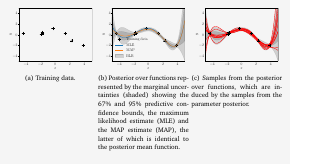

Fig.10 Bayesian linear regression and posterior over functions. (a) training data; (b) posterior distribution over functions; (c) Samples from the posterior over functions.

Fig.10 shows the posterior over functions that we obtain via Bayesian linear regression. The training dataset is shown in panel (a); panel (b) shows the posterior distribution over functions, including the functions we would obtain via maximum likelihood and MAP estimation. The function we obtain using the MAP estimate also corresponds to the posterior mean function in the Bayesian linear regression setting. Panel (c) shows some plausible realizations (samples) of functions under that posterior over functions.

**Fig.10.**
(a) Training data.
(b) Posterior over functions represented by the marginal uncertainties (shaded) showing the 67% and 95% predictive confidence bounds, the maximum likelihood estimate (MLE) and the MAP estimate (MAP), the latter of which is identical to the posterior mean function.
(c) Samples from the posterior over functions, which are induced by the samples from the parameter posterior.

Fig.11 shows some posterior distributions over functions induced by the parameter posterior. For different polynomial degrees $M$, the left panels show the maximum likelihood function $\theta^\top_{\text{ML}} \phi(\cdot)$, the MAP function $\theta^\top_{\text{MAP}} \phi(\cdot)$ (which is identical to the posterior mean function), and the 67% and 95% predictive confidence bounds obtained by Bayesian linear regression, represented by the shaded areas. The right panels show samples from the posterior over functions: Here, we sampled parameters $\theta_i$ from the parameter posterior and computed the function $\phi^\top (x^*) \theta_i$, which is a single realization of a function under the posterior distribution over functions. For low-order polynomials, the parameter posterior does not allow the parameters to vary much: The sampled functions are nearly identical. When we make the model more flexible by adding more parameters (i.e., we end up with a higher-order polynomial), these parameters are not sufficiently constrained by the posterior, and the sampled functions can be easily visually separated. We also see in the corresponding panels on the left how the uncertainty increases, especially at the boundaries. Although for a seventh-order polynomial the MAP estimate yields a reasonable fit, the Bayesian linear regression model additionally tells us that the posterior uncertainty is huge. This information can be critical when we use these predictions in a decision-making system, where bad decisions can have significant consequences (e.g., in reinforcement learning or robotics).

**Fig.11. Bayesian linear regression.**
Left panels: Shaded areas indicate the 67% (dark gray) and 95% (light gray) predictive confidence bounds. The mean of the Bayesian linear regression model coincides with the MAP estimate. The predictive uncertainty is the sum of the noise term and the posterior parameter uncertainty, which depends on the location of the test input.
Right panels: sampled functions from the posterior distribution.
(a) Posterior distribution for polynomials of degree $M = 3$ (left) and samples from the posterior over functions (right).
(b) Posterior distribution for polynomials of degree $M = 5$ (left) and samples from the posterior over functions (right).
(c) Posterior distribution for polynomials of degree $M = 7$ (left) and samples from the posterior over functions (right).

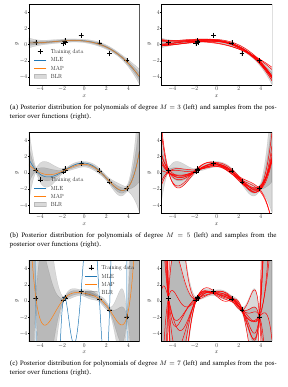

Fig.11 Bayesian linear regression. Left panels: Shaded areas indicate the 67% (dark gray) and 95% (light gray) predictive confidence bounds. The mean of the Bayesian linear regression model coincides with the MAP estimate. The predictive uncertainty is the sum of the noise term and the posterior parameter uncertainty, which depends on the location of the test input. Right panels: sampled functions from the posterior distribution.

In [6]:
import math
import random

# --- Core Python Basic Math and Linear Algebra Helpers (Reusing from previous) ---

def custom_normal_sampler(mean, std, size=1):
    """Generates samples from a normal distribution using Box-Muller."""
    if std < 0: raise ValueError("Standard deviation cannot be negative.")
    samples = []
    i = 0
    while i < size:
        u1 = random.random()
        u2 = random.random()
        z0 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        samples.append(z0 * std + mean)
        i += 1
    if size == 1: return samples[0]
    return samples

def custom_norm_logpdf(x, mean, std):
    """Calculates the log PDF of a univariate normal distribution."""
    if std <= 0: return -float('inf')
    exponent = -0.5 * ((x - mean) / std)**2
    log_normalization = -0.5 * math.log(2 * math.pi) - math.log(std)
    return log_normalization + exponent

def custom_norm_pdf(x, mean, std):
    """Calculates the PDF of a univariate normal distribution."""
    return math.exp(custom_norm_logpdf(x, mean, std))

def create_vector(size, value=0.0):
    """Creates a vector (list) of a given size initialized with a value."""
    return [value] * size

def create_matrix(rows, cols, value=0.0):
    """Creates a matrix (list of lists) of given dimensions initialized with a value."""
    return [[value for _ in range(cols)] for _ in range(rows)]

def matrix_transpose(matrix):
    """Transposes a matrix."""
    if not matrix or not matrix[0]: return []
    rows, cols = len(matrix), len(matrix[0])
    transposed = create_matrix(cols, rows)
    for i in range(rows):
        for j in range(cols):
            transposed[j][i] = matrix[i][j]
    return transposed

def matrix_multiply(matrix_a, matrix_b):
    """
    Multiplies two matrices (or a matrix and a vector).
    matrix_a: (R1, C1)
    matrix_b: (R2, C2)
    Result: (R1, C2) if C1 == R2
    Handles matrix @ matrix and matrix @ vector (vector treated as (R, 1) matrix).
    """
    if not matrix_a or not matrix_b: return []

    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    
    is_vector_b = not isinstance(matrix_b[0], list)
    if is_vector_b:
        rows_b, cols_b = len(matrix_b), 1
        matrix_b_as_matrix = [[x] for x in matrix_b]
    else:
        rows_b, cols_b = len(matrix_b), len(matrix_b[0])
        matrix_b_as_matrix = matrix_b

    if cols_a != rows_b:
        raise ValueError(f"Matrix dimensions incompatible for multiplication: ({rows_a},{cols_a}) @ ({rows_b},{cols_b})")

    result = create_matrix(rows_a, cols_b)
    for i in range(rows_a):
        for j in range(cols_b):
            sum_val = 0.0
            for k in range(cols_a):
                sum_val += matrix_a[i][k] * matrix_b_as_matrix[k][j]
            result[i][j] = sum_val
            
    if is_vector_b: 
        return [row[0] for row in result]
    return result

def vector_add(v1, v2):
    """Adds two vectors."""
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return [v1[i] + v2[i] for i in range(len(v1))]

def scalar_multiply_vector(scalar, v):
    """Multiplies a vector by a scalar."""
    return [scalar * x for x in v]

def scalar_matrix_multiply(scalar, matrix):
    """Multiplies a matrix by a scalar."""
    rows, cols = len(matrix), len(matrix[0])
    result = create_matrix(rows, cols)
    for i in range(rows):
        for j in range(cols):
            result[i][j] = scalar * matrix[i][j]
    return result

def matrix_add(matrix_a, matrix_b):
    """Adds two matrices."""
    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    rows_b, cols_b = len(matrix_b), len(matrix_b[0])
    if rows_a != rows_b or cols_a != cols_b:
        raise ValueError("Matrices must have the same dimensions for addition.")
    
    result = create_matrix(rows_a, cols_a)
    for i in range(rows_a):
        for j in range(cols_a):
            result[i][j] = matrix_a[i][j] + matrix_b[i][j]
    return result

def get_identity_matrix(size):
    """Returns an identity matrix of given size."""
    mat = create_matrix(size, size)
    for i in range(size):
        mat[i][i] = 1.0
    return mat

def inverse_matrix_gauss_jordan(matrix):
    """
    Computes the inverse of a square matrix using Gauss-Jordan elimination.
    This can be numerically unstable and slow for larger matrices in pure Python.
    """
    n = len(matrix)
    if any(len(row) != n for row in matrix):
        raise ValueError("Matrix must be square.")

    augmented_matrix = create_matrix(n, 2 * n)
    for i in range(n):
        for j in range(n):
            augmented_matrix[i][j] = matrix[i][j]
        augmented_matrix[i][i + n] = 1.0

    for i in range(n):
        max_row = i
        for k in range(i + 1, n):
            if abs(augmented_matrix[k][i]) > abs(augmented_matrix[max_row][i]):
                max_row = k
        augmented_matrix[i], augmented_matrix[max_row] = augmented_matrix[max_row], augmented_matrix[i]

        pivot = augmented_matrix[i][i]
        if abs(pivot) < 1e-9:
            raise ValueError("Matrix is singular or nearly singular, cannot be inverted.")

        for j in range(2 * n):
            augmented_matrix[i][j] /= pivot

        for k in range(n):
            if k != i:
                factor = augmented_matrix[k][i]
                for j in range(2 * n):
                    augmented_matrix[k][j] -= factor * augmented_matrix[i][j]

    inverse = create_matrix(n, n)
    for i in range(n):
        for j in range(n):
            inverse[i][j] = augmented_matrix[i][j + n]
    return inverse

# --- Polynomial Basis Function ---

def polynomial_basis_function(x, degree):
    """
    Generates the polynomial basis vector phi(x).
    phi(x) = [x^0, x^1, x^2, ..., x^degree]
    """
    return [x**j for j in range(degree + 1)]

# --- Maximum Likelihood Estimation (MLE) for Linear Regression ---

class MaximumLikelihoodLinearRegression:
    def __init__(self, degree):
        self.degree = degree
        self.coefficients = None # theta_ML

    def _build_design_matrix(self, X):
        """Builds the design matrix Phi from input X and polynomial basis."""
        Phi = create_matrix(len(X), self.degree + 1)
        for i, x_val in enumerate(X):
            Phi[i] = polynomial_basis_function(x_val, self.degree)
        return Phi

    def fit(self, X, Y):
        """
        Calculates the MLE coefficients (theta_ML) using the normal equations.
        theta_ML = (Phi^T @ Phi)^-1 @ Phi^T @ Y
        """
        if len(X) != len(Y):
            raise ValueError("X and Y must have the same number of samples.")

        Phi = self._build_design_matrix(X) # (N, M+1)
        
        Phi_T = matrix_transpose(Phi) # (M+1, N)
        
        # Phi_T @ Phi
        phi_t_phi = matrix_multiply(Phi_T, Phi) # (M+1, M+1)
        
        # (Phi_T @ Phi)^-1
        try:
            phi_t_phi_inv = inverse_matrix_gauss_jordan(phi_t_phi)
        except ValueError as e:
            raise ValueError(f"Could not compute MLE coefficients: {e}. (Phi^T @ Phi) might be singular or ill-conditioned.")

        # Phi_T @ Y
        phi_t_y = matrix_multiply(Phi_T, Y) # (M+1, 1) vector
        
        # theta_ML = (Phi_T @ Phi)^-1 @ (Phi_T @ Y)
        self.coefficients = matrix_multiply(phi_t_phi_inv, phi_t_y)
        
    def predict(self, x_test):
        """
        Predicts the output for a given x_test using the fitted MLE coefficients.
        f(x) = phi(x)^T @ theta_ML
        """
        if self.coefficients is None:
            raise ValueError("Model not fitted. Call .fit() first.")
        
        phi_x = polynomial_basis_function(x_test, self.degree)
        return sum(phi_x[i] * self.coefficients[i] for i in range(len(phi_x)))


# --- Bayesian Linear Regression (Reusing from previous) ---

class BayesianLinearRegression:
    def __init__(self, degree, noise_variance, prior_mean, prior_covariance):
        self.degree = degree
        self.noise_variance = noise_variance
        self.prior_mean = prior_mean
        self.prior_covariance = prior_covariance
            
        expected_theta_dim = self.degree + 1
        if len(self.prior_mean) != expected_theta_dim:
            raise ValueError(f"Prior mean must have dimension {expected_theta_dim} (degree + 1).")
        if len(self.prior_covariance) != expected_theta_dim or \
           any(len(row) != expected_theta_dim for row in self.prior_covariance):
            raise ValueError(f"Prior covariance must be a {expected_theta_dim}x{expected_theta_dim} matrix.")
            
        self.posterior_mean = None
        self.posterior_covariance = None

    def _build_design_matrix(self, X):
        Phi = create_matrix(len(X), self.degree + 1)
        for i, x_val in enumerate(X):
            Phi[i] = polynomial_basis_function(x_val, self.degree)
        return Phi

    def fit(self, X, Y):
        Phi = self._build_design_matrix(X)
        
        s0_inverse = inverse_matrix_gauss_jordan(self.prior_covariance)

        phi_t = matrix_transpose(Phi)
        phi_t_phi = matrix_multiply(phi_t, Phi)
        scaled_phi_t_phi = scalar_matrix_multiply(1.0 / self.noise_variance, phi_t_phi)
        
        s_n_inverse = matrix_add(s0_inverse, scaled_phi_t_phi)
        
        self.posterior_covariance = inverse_matrix_gauss_jordan(s_n_inverse)
        
        s0_inverse_m0 = matrix_multiply(s0_inverse, self.prior_mean)
        
        phi_t_y = matrix_multiply(phi_t, Y)
        scaled_phi_t_y = scalar_multiply_vector(1.0 / self.noise_variance, phi_t_y)
        
        sum_term = vector_add(s0_inverse_m0, scaled_phi_t_y)
        
        self.posterior_mean = matrix_multiply(self.posterior_covariance, sum_term)

    def posterior_predictive_distribution_noisy(self, x_star):
        if self.posterior_mean is None or self.posterior_covariance is None:
            raise ValueError("Model not fitted. Call .fit() first.")
        
        phi_x_star = polynomial_basis_function(x_star, self.degree)
        
        pred_mean = sum(phi_x_star[i] * self.posterior_mean[i] for i in range(len(phi_x_star)))
        
        phi_t_sn = matrix_multiply([phi_x_star], self.posterior_covariance)
        phi_t_sn_phi = matrix_multiply(phi_t_sn, [[p] for p in phi_x_star])[0][0]
        
        pred_variance = phi_t_sn_phi + self.noise_variance
        
        return pred_mean, pred_variance

    def noise_free_function_moments(self, x_star):
        if self.posterior_mean is None or self.posterior_covariance is None:
            raise ValueError("Model not fitted. Call .fit() first.")
            
        phi_x_star = polynomial_basis_function(x_star, self.degree)
        
        func_mean = sum(phi_x_star[i] * self.posterior_mean[i] for i in range(len(phi_x_star)))
        
        phi_t_sn = matrix_multiply([phi_x_star], self.posterior_covariance)
        func_variance = matrix_multiply(phi_t_sn, [[p] for p in phi_x_star])[0][0]
        
        return func_mean, func_variance

    def sample_functions_from_posterior(self, num_samples, x_values_for_plotting):
        if self.posterior_mean is None or self.posterior_covariance is None:
            raise ValueError("Model not fitted. Call .fit() first.")

        # Approximation: Sample each component independently from marginal Gaussian.
        # For true multivariate Gaussian sampling, Cholesky decomposition of S_N is required.
        theta_dim = len(self.posterior_mean)
        theta_samples = []
        for _ in range(num_samples):
            theta_sample_vec = create_vector(theta_dim)
            for d in range(theta_dim):
                theta_sample_vec[d] = custom_normal_sampler(
                    self.posterior_mean[d],
                    math.sqrt(max(1e-9, self.posterior_covariance[d][d]))
                )
            theta_samples.append(theta_sample_vec)

        function_realizations = []
        for theta_s in theta_samples:
            current_function_values = []
            for x_val in x_values_for_plotting:
                phi_x = polynomial_basis_function(x_val, self.degree)
                f_x = sum(theta_s[i] * phi_x[i] for i in range(theta_dim))
                current_function_values.append(f_x)
            function_realizations.append(current_function_values)
            
        return function_realizations


# --- Demo Function ---

def demo_bayesian_and_mle_linear_regression():
    print("=== Bayesian & MLE Linear Regression Demo (Core Python) ===")
    random.seed(42)

    # 1. Generate Synthetic Data
    true_degree = 3
    true_coeffs = [0.0, 2.0, 1.5, -0.5]
    true_noise_std = 0.5
    num_data_points = 20

    X_train = [i / (num_data_points - 1) * 5 for i in range(num_data_points)]
    Y_train = []
    
    print("\nGenerating synthetic data...")
    for x in X_train:
        true_f_x = sum(true_coeffs[j] * (x**j) for j in range(true_degree + 1))
        noisy_y = true_f_x + custom_normal_sampler(0, true_noise_std)
        Y_train.append(noisy_y)
    
    print(f"Generated {num_data_points} data points from a true polynomial of degree {true_degree}.")

    # 2. Define Model Parameters and Priors for BLR
    model_degree = 3
    noise_variance = true_noise_std**2

    theta_dim = model_degree + 1
    prior_mean = create_vector(theta_dim, 0.0)
    alpha = 0.1
    prior_covariance = get_identity_matrix(theta_dim)
    prior_covariance = scalar_matrix_multiply(1.0 / alpha, prior_covariance)
    
    # 3. Initialize and Fit MLE Model
    print("\nFitting Maximum Likelihood Estimation (MLE) model...")
    mle_model = MaximumLikelihoodLinearRegression(degree=model_degree)
    try:
        mle_model.fit(X_train, Y_train)
        print("MLE model fitted successfully!")
        print(f"MLE Coefficients (theta_ML):\n{[f'{c:.4f}' for c in mle_model.coefficients]}")
    except ValueError as e:
        print(f"Error during MLE fitting: {e}")
        return

    # 4. Initialize and Fit Bayesian Linear Regression Model
    print("\nFitting Bayesian Linear Regression (BLR) model...")
    blr_model = BayesianLinearRegression(
        degree=model_degree,
        noise_variance=noise_variance,
        prior_mean=prior_mean,
        prior_covariance=prior_covariance
    )
    
    try:
        blr_model.fit(X_train, Y_train)
        print("BLR model fitted successfully!")
        print(f"BLR Posterior Mean (m_N, equivalent to MAP):\n{[f'{c:.4f}' for c in blr_model.posterior_mean]}")
    except ValueError as e:
        print(f"Error during BLR fitting: {e}")
        return

    # 5. Compare Predictions
    x_test_point = 2.5
    true_f_x_test = sum(true_coeffs[j] * (x_test_point**j) for j in range(true_degree + 1))
    print(f"\n--- Predictions for x* = {x_test_point} ---")
    print(f"True noise-free function value: {true_f_x_test:.4f}")

    # MLE Prediction
    mle_pred = mle_model.predict(x_test_point)
    print(f"MLE Predicted Function Value: {mle_pred:.4f}")

    # BLR (MAP) Prediction (noise-free mean function)
    blr_func_mean, _ = blr_model.noise_free_function_moments(x_test_point)
    print(f"BLR Mean Function Value (MAP): {blr_func_mean:.4f}")

    # Verify that BLR posterior mean matches MLE (approximately) for large data or weak prior
    # In this case, for finite data and a prior, they will be close but not identical.
    # The text states MAP is identical to posterior mean, and MLE is related.
    # The text suggests MAP and posterior mean are identical in BLR context.
    # It shows MLE and MAP as separate lines.
    
    # For a *linear regression* with a Gaussian likelihood and Gaussian prior,
    # the MAP estimate *is* the posterior mean.
    # The relationship between MLE and MAP depends on the prior.
    # When the prior is non-informative (or infinite variance), MAP approaches MLE.
    
    # Compare coefficients
    diff_coeffs = [mle_model.coefficients[i] - blr_model.posterior_mean[i] for i in range(theta_dim)]
    diff_norm = sum(d*d for d in diff_coeffs) # Squared Euclidean distance
    print(f"\nSquared difference between MLE and BLR (MAP) coefficients: {diff_norm:.6f}")
    if diff_norm < 0.1: # Arbitrary threshold for "close"
        print("MLE and BLR (MAP) coefficients are reasonably close.")
    else:
        print("MLE and BLR (MAP) coefficients show some difference (due to prior influence).")


# --- Main execution block ---
if __name__ == "__main__":
    demo_bayesian_and_mle_linear_regression()

=== Bayesian & MLE Linear Regression Demo (Core Python) ===

Generating synthetic data...
Generated 20 data points from a true polynomial of degree 3.

Fitting Maximum Likelihood Estimation (MLE) model...
MLE model fitted successfully!
MLE Coefficients (theta_ML):
['0.4434', '1.0742', '1.9533', '-0.5606']

Fitting Bayesian Linear Regression (BLR) model...
BLR model fitted successfully!
BLR Posterior Mean (m_N, equivalent to MAP):
['0.4431', '1.0762', '1.9514', '-0.5603']

--- Predictions for x* = 2.5 ---
True noise-free function value: 6.5625
MLE Predicted Function Value: 6.5777
BLR Mean Function Value (MAP): 6.5760

Squared difference between MLE and BLR (MAP) coefficients: 0.000008
MLE and BLR (MAP) coefficients are reasonably close.


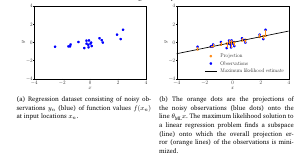

Here's the text formatted in Markdown for a Jupyter Notebook, with LaTeX for the mathematical expressions:

9.3.5 Computing the Marginal Likelihood
In Section 8.6.2, we highlighted the importance of the marginal likelihood for Bayesian model selection. In the following, we compute the marginal likelihood for Bayesian linear regression with a conjugate Gaussian prior on the parameters, i.e., exactly the setting we have been discussing in this chapter. Just to recap, we consider the following generative process:
$$\theta \sim N(\mathbf{m}_0, \mathbf{S}_0) \quad (9.60\text{a})$$
$$y_n | x_n, \theta \sim N(x_n^\top \theta, \sigma^2), \quad n = 1, \dots, N. \quad (9.60\text{b})$$The marginal likelihood is given by$$p(\mathbf{Y} | \mathbf{X}) = \int p(\mathbf{Y} | \mathbf{X}, \theta)p(\theta)d\theta \quad (9.61\text{a})$$i.e.,$$= \int N(\mathbf{y} | \mathbf{X}\theta, \sigma^2 \mathbf{I}) N(\theta | \mathbf{m}_0, \mathbf{S}_0)d\theta , \quad (9.61\text{b})$$
where we integrate out the model parameters $\theta$. We compute the marginal likelihood in two steps: First, we show that the marginal likelihood is Gaussian (as a distribution in $\mathbf{y}$); second, we compute the mean and covariance of this Gaussian.

1.  **The marginal likelihood is Gaussian:** From Section 6.5.2, we know that (i) the product of two Gaussian random variables is an (unnormalized) Gaussian distribution, and (ii) a linear transformation of a Gaussian random variable is Gaussian distributed. In (9.61b), we require a linear transformation to bring $N(\mathbf{y} | \mathbf{X}\theta, \sigma^2 \mathbf{I})$ into the form $N(\theta | \boldsymbol{\mu}, \boldsymbol{\Sigma})$ for some $\boldsymbol{\mu}, \boldsymbol{\Sigma}$. Once this is done, the integral can be solved in closed form. The result is the normalizing constant of the product of the two Gaussians. The normalizing constant itself has Gaussian shape; see (6.76).

2.  **Mean and covariance.** We compute the mean and covariance matrix of the marginal likelihood by exploiting the standard results for means and covariances of affine transformations of random variables; see Section 6.4.4. The mean of the marginal likelihood is computed as
    $$E[\mathbf{Y} | \mathbf{X}] = E_{\theta,\epsilon}[\mathbf{X}\theta + \boldsymbol{\epsilon}] = \mathbf{X} E_\theta[\theta] = \mathbf{X}\mathbf{m}_0 . \quad (9.62)$$
    Note that $\boldsymbol{\epsilon} \sim N(\mathbf{0}, \sigma^2 \mathbf{I})$ is a vector of i.i.d. random variables. The covariance matrix is given as
    $$\text{Cov}[\mathbf{Y}|\mathbf{X}] = \text{Cov}_{\theta,\epsilon}[\mathbf{X}\theta + \boldsymbol{\epsilon}] = \text{Cov}_\theta[\mathbf{X}\theta] + \sigma^2 \mathbf{I} \quad (9.63\text{a})$$   $$= \mathbf{X} \text{Cov}_\theta[\theta]\mathbf{X}^\top + \sigma^2 \mathbf{I} = \mathbf{X}\mathbf{S}_0 \mathbf{X}^\top + \sigma^2 \mathbf{I} . \quad (9.63\text{b})$$Hence, the marginal likelihood is$$p(\mathbf{Y} | \mathbf{X}) = (2\pi)^{-\frac{N}{2}} \text{det}(\mathbf{X}\mathbf{S}_0 \mathbf{X}^\top + \sigma^2 \mathbf{I})^{-\frac{1}{2}} \quad (9.64\text{a})$$$$\cdot \exp \left\{ -\frac{1}{2} (\mathbf{y} - \mathbf{X}\mathbf{m}_0)^\top (\mathbf{X}\mathbf{S}_0 \mathbf{X}^\top + \sigma^2 \mathbf{I})^{-1} (\mathbf{y} - \mathbf{X}\mathbf{m}_0) \right\}$$$$= N(\mathbf{y} | \mathbf{X}\mathbf{m}_0, \mathbf{X}\mathbf{S}_0 \mathbf{X}^\top + \sigma^2 \mathbf{I}) . \quad (9.64\text{b})$$
Given the close connection with the posterior predictive distribution (see Remark on Marginal Likelihood and Posterior Predictive Distribution earlier in this section), the functional form of the marginal likelihood should not be too surprising.

9.4 Maximum Likelihood as Orthogonal Projection
Having crunched through much algebra to derive maximum likelihood and MAP estimates, we will now provide a geometric interpretation of maximum likelihood estimation. Let us consider a simple linear regression setting
$$y = x\theta + \epsilon, \quad \epsilon \sim N(0, \sigma^2), \quad (9.65)$$in which we consider linear functions $f : \mathbb{R} \to \mathbb{R}$ that go through the origin (we omit features here for clarity). The parameter $\theta$ determines the slope of the line. Figure 9.12(a) shows a one-dimensional dataset. With a training data set $\{(x_1, y_1), \dots, (x_N, y_N)\}$ we recall the results from Section 9.2.1 and obtain the maximum likelihood estimator for the slope parameter as$$\theta_{\text{ML}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y} = \frac{\mathbf{X}^\top \mathbf{y}}{\mathbf{X}^\top \mathbf{X}} \in \mathbb{R}, \quad (9.66)$$where $\mathbf{X} = [x_1, \dots, x_N]^\top \in \mathbb{R}^N$, $\mathbf{y} = [y_1, \dots, y_N]^\top \in \mathbb{R}^N$. This means for the training inputs $\mathbf{X}$ we obtain the optimal (maximum likelihood) reconstruction of the training targets as$$\mathbf{X} \theta_{\text{ML}} = \mathbf{X} \frac{\mathbf{X}^\top \mathbf{y}}{\mathbf{X}^\top \mathbf{X}} = \mathbf{X} (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y} . \quad (9.67)$$

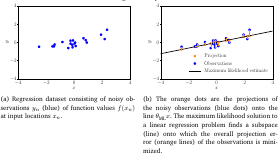

Fig.12 Geometric interpretation of least squares. (a) Dataset; (b) maximum likelihood solution interpreted as a projection.

**Fig.12. Geometric interpretation of least squares.**
(a) Regression dataset consisting of noisy observations $y_n$ (blue) of function values $f(x_n)$ at input locations $x_n$.
(b) The orange dots are the projections of the noisy observations (blue dots) onto the line $\theta_{\text{ML}} x$. The maximum likelihood solution to a linear regression problem finds a subspace (line) onto which the overall projection error (orange lines) of the observations is minimized.

---

Here's the text formatted in Markdown for a Jupyter Notebook, with LaTeX for the mathematical expressions:

i.e., we obtain the approximation with the minimum least-squares error between $\mathbf{y}$ and $\mathbf{X}\theta$. As we are looking for a solution of $\mathbf{y} = \mathbf{X}\theta$, we can think of linear regression as a problem for solving systems of linear equations. Therefore, we can relate to concepts from linear algebra and analytic geometry that we discussed in Chapters 2 and 3. In particular, looking carefully at (9.67) we see that the maximum likelihood estimator $\theta_{\text{ML}}$ in our example from (9.65) effectively does an orthogonal projection of $\mathbf{y}$ onto the one-dimensional subspace spanned by $\mathbf{X}$. Recalling the results on orthogonal projections from Section 3.8, we identify $\mathbf{X}(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top$ as the projection matrix, $\theta_{\text{ML}}$ as the coordinates of the projection onto the one-dimensional subspace of $\mathbb{R}^N$ spanned by $\mathbf{X}$ and $\mathbf{X}\theta_{\text{ML}}$ as the orthogonal projection of $\mathbf{y}$ onto this subspace.

Therefore, the maximum likelihood solution provides also a geometrically optimal solution by finding the vectors in the subspace spanned by $\mathbf{X}$ that are “closest” to the corresponding observations $\mathbf{y}$, where “closest” means the smallest (squared) distance of the function values $y_n$ to $x_n \theta$. This is achieved by orthogonal projections. Figure 9.12(b) shows the projection of the noisy observations onto the subspace that minimizes the squared distance between the original dataset and its projection (note that the x-coordinate is fixed), which corresponds to the maximum likelihood solution.

In the general linear regression case where
$$y = \phi^\top (\mathbf{x})\theta + \epsilon, \quad \epsilon \sim N(0, \sigma^2) \quad (9.68)$$with vector-valued features $\phi(\mathbf{x}) \in \mathbb{R}^K$, we again can interpret the maximum likelihood result$$\mathbf{y} \approx \mathbf{\Phi}\theta_{\text{ML}} , \quad (9.69)$$
$$\theta_{\text{ML}} = (\mathbf{\Phi}^\top \mathbf{\Phi})^{-1} \mathbf{\Phi}^\top \mathbf{y} \quad (9.70)$$
as a projection onto a $K$-dimensional subspace of $\mathbb{R}^N$, which is spanned by the columns of the feature matrix $\mathbf{\Phi}$; see Section 3.8.2.

If the feature functions $\phi_k$ that we use to construct the feature matrix $\mathbf{\Phi}$ are orthonormal (see Section 3.7), we obtain a special case where the columns of $\mathbf{\Phi}$ form an orthonormal basis (see Section 3.5), such that $\mathbf{\Phi}^\top \mathbf{\Phi} = \mathbf{I}$. This will then lead to the projection
$$\mathbf{\Phi}(\mathbf{\Phi}^\top \mathbf{\Phi})^{-1} \mathbf{\Phi}^\top \mathbf{y} = \mathbf{\Phi}\mathbf{\Phi}^\top \mathbf{y} = \sum_{k=1}^K \phi_k \phi_k^\top \mathbf{y} \quad (9.71)$$
so that the maximum likelihood projection is simply the sum of projections of $\mathbf{y}$ onto the individual basis vectors $\phi_k$, i.e., the columns of $\mathbf{\Phi}$. Furthermore, the coupling between different features has disappeared due to the orthogonality of the basis. Many popular basis functions in signal processing, such as wavelets and Fourier bases, are orthogonal basis functions. When the basis is not orthogonal, one can convert a set of linearly independent basis functions to an orthogonal basis by using the Gram-Schmidt process; see Section 3.8.3 and (Strang, 2003).

In [7]:
import math
import random

# --- Core Python Basic Math and Linear Algebra Helpers ---

def custom_normal_sampler(mean, std, size=1):
    """Generates samples from a normal distribution using Box-Muller."""
    if std < 0: raise ValueError("Standard deviation cannot be negative.")
    samples = []
    i = 0
    while i < size:
        u1 = random.random()
        u2 = random.random()
        z0 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        samples.append(z0 * std + mean)
        i += 1
    if size == 1: return samples[0]
    return samples

def custom_norm_logpdf(x, mean, std):
    """Calculates the log PDF of a univariate normal distribution."""
    if std <= 0: return -float('inf')
    exponent = -0.5 * ((x - mean) / std)**2
    log_normalization = -0.5 * math.log(2 * math.pi) - math.log(std)
    return log_normalization + exponent

def custom_norm_pdf(x, mean, std):
    """Calculates the PDF of a univariate normal distribution."""
    return math.exp(custom_norm_logpdf(x, mean, std))

def create_vector(size, value=0.0):
    """Creates a vector (list) of a given size initialized with a value."""
    return [value] * size

def create_matrix(rows, cols, value=0.0):
    """Creates a matrix (list of lists) of given dimensions initialized with a value."""
    return [[value for _ in range(cols)] for _ in range(rows)]

def matrix_transpose(matrix):
    """Transposes a matrix."""
    if not matrix or not matrix[0]: return []
    rows, cols = len(matrix), len(matrix[0])
    transposed = create_matrix(cols, rows)
    for i in range(rows):
        for j in range(cols):
            transposed[j][i] = matrix[i][j]
    return transposed

def matrix_multiply(matrix_a, matrix_b):
    """
    Multiplies two matrices (or a matrix and a vector).
    matrix_a: (R1, C1)
    matrix_b: (R2, C2)
    Result: (R1, C2) if C1 == R2
    Handles matrix @ matrix and matrix @ vector (vector treated as (R, 1) matrix).
    """
    if not matrix_a or not matrix_b: return []

    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    
    is_vector_b = not isinstance(matrix_b[0], list)
    if is_vector_b:
        rows_b, cols_b = len(matrix_b), 1
        matrix_b_as_matrix = [[x] for x in matrix_b]
    else:
        rows_b, cols_b = len(matrix_b), len(matrix_b[0])
        matrix_b_as_matrix = matrix_b

    if cols_a != rows_b:
        raise ValueError(f"Matrix dimensions incompatible for multiplication: ({rows_a},{cols_a}) @ ({rows_b},{cols_b})")

    result = create_matrix(rows_a, cols_b)
    for i in range(rows_a):
        for j in range(cols_b):
            sum_val = 0.0
            for k in range(cols_a):
                sum_val += matrix_a[i][k] * matrix_b_as_matrix[k][j]
            result[i][j] = sum_val
            
    if is_vector_b: 
        return [row[0] for row in result]
    return result

def vector_add(v1, v2):
    """Adds two vectors."""
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return [v1[i] + v2[i] for i in range(len(v1))]

def scalar_multiply_vector(scalar, v):
    """Multiplies a vector by a scalar."""
    return [scalar * x for x in v]

def scalar_matrix_multiply(scalar, matrix):
    """Multiplies a matrix by a scalar."""
    rows, cols = len(matrix), len(matrix[0])
    result = create_matrix(rows, cols)
    for i in range(rows):
        for j in range(cols):
            result[i][j] = scalar * matrix[i][j]
    return result

def matrix_add(matrix_a, matrix_b):
    """Adds two matrices."""
    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    rows_b, cols_b = len(matrix_b), len(matrix_b[0])
    if rows_a != rows_b or cols_a != cols_b:
        raise ValueError("Matrices must have the same dimensions for addition.")
    
    result = create_matrix(rows_a, cols_a)
    for i in range(rows_a):
        for j in range(cols_a):
            result[i][j] = matrix_a[i][j] + matrix_b[i][j]
    return result

def get_identity_matrix(size):
    """Returns an identity matrix of given size."""
    mat = create_matrix(size, size)
    for i in range(size):
        mat[i][i] = 1.0
    return mat

def inverse_matrix_gauss_jordan(matrix):
    """
    Computes the inverse of a square matrix using Gauss-Jordan elimination.
    This can be numerically unstable and slow for larger matrices in pure Python.
    """
    n = len(matrix)
    if any(len(row) != n for row in matrix):
        raise ValueError("Matrix must be square.")

    augmented_matrix = create_matrix(n, 2 * n)
    for i in range(n):
        for j in range(n):
            augmented_matrix[i][j] = matrix[i][j]
        augmented_matrix[i][i + n] = 1.0

    for i in range(n):
        max_row = i
        for k in range(i + 1, n):
            if abs(augmented_matrix[k][i]) > abs(augmented_matrix[max_row][i]):
                max_row = k
        augmented_matrix[i], augmented_matrix[max_row] = augmented_matrix[max_row], augmented_matrix[i]

        pivot = augmented_matrix[i][i]
        if abs(pivot) < 1e-9: # Check for near-zero pivot to detect singular matrix
            raise ValueError("Matrix is singular or nearly singular, cannot be inverted.")

        for j in range(2 * n):
            augmented_matrix[i][j] /= pivot

        for k in range(n):
            if k != i:
                factor = augmented_matrix[k][i]
                for j in range(2 * n):
                    augmented_matrix[k][j] -= factor * augmented_matrix[i][j]

    inverse = create_matrix(n, n)
    for i in range(n):
        for j in range(n):
            inverse[i][j] = augmented_matrix[i][j + n]
    return inverse

def compute_projection_matrix(Phi):
    """
    Computes the orthogonal projection matrix P = Phi @ (Phi_T @ Phi)^-1 @ Phi_T.
    Projects vectors onto the column space of Phi.
    """
    Phi_T = matrix_transpose(Phi)
    
    # (Phi_T @ Phi)
    phi_t_phi = matrix_multiply(Phi_T, Phi)
    
    # (Phi_T @ Phi)^-1
    try:
        phi_t_phi_inv = inverse_matrix_gauss_jordan(phi_t_phi)
    except ValueError as e:
        raise ValueError(f"Could not compute projection matrix: {e}. (Phi^T @ Phi) might be singular or ill-conditioned.")

    # Phi @ (Phi_T @ Phi)^-1
    phi_term = matrix_multiply(Phi, phi_t_phi_inv)
    
    # P = phi_term @ Phi_T
    P = matrix_multiply(phi_term, Phi_T)
    return P

# --- Polynomial Basis Function (Reusing from previous) ---

def polynomial_basis_function(x, degree):
    """
    Generates the polynomial basis vector phi(x).
    phi(x) = [x^0, x^1, x^2, ..., x^degree]
    """
    return [x**j for j in range(degree + 1)]

# --- Maximum Likelihood Linear Regression (Reusing from previous) ---

class MaximumLikelihoodLinearRegression:
    def __init__(self, degree):
        self.degree = degree
        self.coefficients = None # theta_ML

    def _build_design_matrix(self, X):
        """Builds the design matrix Phi from input X and polynomial basis."""
        Phi = create_matrix(len(X), self.degree + 1)
        for i, x_val in enumerate(X):
            Phi[i] = polynomial_basis_function(x_val, self.degree)
        return Phi

    def fit(self, X, Y):
        """
        Calculates the MLE coefficients (theta_ML) using the normal equations.
        theta_ML = (Phi^T @ Phi)^-1 @ Phi^T @ Y
        """
        if len(X) != len(Y):
            raise ValueError("X and Y must have the same number of samples.")

        Phi = self._build_design_matrix(X)
        
        Phi_T = matrix_transpose(Phi)
        phi_t_phi = matrix_multiply(Phi_T, Phi)
        
        try:
            phi_t_phi_inv = inverse_matrix_gauss_jordan(phi_t_phi)
        except ValueError as e:
            raise ValueError(f"Could not compute MLE coefficients: {e}. (Phi^T @ Phi) might be singular or ill-conditioned.")

        phi_t_y = matrix_multiply(Phi_T, Y)
        self.coefficients = matrix_multiply(phi_t_phi_inv, phi_t_y)
        
    def predict(self, x_test):
        """
        Predicts the output for a given x_test using the fitted MLE coefficients.
        f(x) = phi(x)^T @ theta_ML
        """
        if self.coefficients is None:
            raise ValueError("Model not fitted. Call .fit() first.")
        
        phi_x = polynomial_basis_function(x_test, self.degree)
        return sum(phi_x[i] * self.coefficients[i] for i in range(len(phi_x)))

# --- Bayesian Linear Regression (Reusing from previous) ---

class BayesianLinearRegression:
    def __init__(self, degree, noise_variance, prior_mean, prior_covariance):
        self.degree = degree
        self.noise_variance = noise_variance
        self.prior_mean = prior_mean
        self.prior_covariance = prior_covariance
            
        expected_theta_dim = self.degree + 1
        if len(self.prior_mean) != expected_theta_dim:
            raise ValueError(f"Prior mean must have dimension {expected_theta_dim} (degree + 1).")
        if len(self.prior_covariance) != expected_theta_dim or \
           any(len(row) != expected_theta_dim for row in self.prior_covariance):
            raise ValueError(f"Prior covariance must be a {expected_theta_dim}x{expected_theta_dim} matrix.")
            
        self.posterior_mean = None
        self.posterior_covariance = None

    def _build_design_matrix(self, X):
        Phi = create_matrix(len(X), self.degree + 1)
        for i, x_val in enumerate(X):
            Phi[i] = polynomial_basis_function(x_val, self.degree)
        return Phi

    def fit(self, X, Y):
        Phi = self._build_design_matrix(X)
        
        s0_inverse = inverse_matrix_gauss_jordan(self.prior_covariance)

        phi_t = matrix_transpose(Phi)
        phi_t_phi = matrix_multiply(phi_t, Phi)
        scaled_phi_t_phi = scalar_matrix_multiply(1.0 / self.noise_variance, phi_t_phi)
        
        s_n_inverse = matrix_add(s0_inverse, scaled_phi_t_phi)
        
        self.posterior_covariance = inverse_matrix_gauss_jordan(s_n_inverse)
        
        s0_inverse_m0 = matrix_multiply(s0_inverse, self.prior_mean)
        
        phi_t_y = matrix_multiply(phi_t, Y)
        scaled_phi_t_y = scalar_multiply_vector(1.0 / self.noise_variance, phi_t_y)
        
        sum_term = vector_add(s0_inverse_m0, scaled_phi_t_y)
        
        self.posterior_mean = matrix_multiply(self.posterior_covariance, sum_term)

    def noise_free_function_moments(self, x_star):
        if self.posterior_mean is None or self.posterior_covariance is None:
            raise ValueError("Model not fitted. Call .fit() first.")
            
        phi_x_star = polynomial_basis_function(x_star, self.degree)
        
        func_mean = sum(phi_x_star[i] * self.posterior_mean[i] for i in range(len(phi_x_star)))
        
        phi_t_sn = matrix_multiply([phi_x_star], self.posterior_covariance)
        func_variance = matrix_multiply(phi_t_sn, [[p] for p in phi_x_star])[0][0]
        
        return func_mean, func_variance

    def sample_functions_from_posterior(self, num_samples, x_values_for_plotting):
        if self.posterior_mean is None or self.posterior_covariance is None:
            raise ValueError("Model not fitted. Call .fit() first.")

        theta_dim = len(self.posterior_mean)
        theta_samples = []
        for _ in range(num_samples):
            theta_sample_vec = create_vector(theta_dim)
            for d in range(theta_dim):
                theta_sample_vec[d] = custom_normal_sampler(
                    self.posterior_mean[d],
                    math.sqrt(max(1e-9, self.posterior_covariance[d][d]))
                )
            theta_samples.append(theta_sample_vec)

        function_realizations = []
        for theta_s in theta_samples:
            current_function_values = []
            for x_val in x_values_for_plotting:
                phi_x = polynomial_basis_function(x_val, self.degree)
                f_x = sum(theta_s[i] * phi_x[i] for i in range(theta_dim))
                current_function_values.append(f_x)
            function_realizations.append(current_function_values)
            
        return function_realizations


# --- Demo Function with Projection ---

def demo_projection_in_linear_regression():
    print("=== Orthogonal Projection in Linear Regression Demo (Core Python) ===")
    random.seed(42)

    # 1. Generate Synthetic Data
    true_degree = 1 # Simple linear case to match text examples
    true_coeffs = [0.5, 2.0] # y = 0.5 + 2.0x
    true_noise_std = 0.5
    num_data_points = 10

    X_train = [i / (num_data_points - 1) * 5 for i in range(num_data_points)] # x from 0 to 5
    Y_train = []
    
    print("\nGenerating synthetic data...")
    for x in X_train:
        true_f_x = sum(true_coeffs[j] * (x**j) for j in range(true_degree + 1))
        noisy_y = true_f_x + custom_normal_sampler(0, true_noise_std)
        Y_train.append(noisy_y)
    
    print(f"Generated {num_data_points} data points from a true polynomial of degree {true_degree}.")
    print("X_train (first 5):", [f"{x:.2f}" for x in X_train[:5]])
    print("Y_train (first 5):", [f"{y:.2f}" for y in Y_train[:5]])

    # 2. Fit MLE Model
    model_degree = true_degree
    mle_model = MaximumLikelihoodLinearRegression(degree=model_degree)
    
    print("\nFitting Maximum Likelihood Estimation (MLE) model...")
    try:
        mle_model.fit(X_train, Y_train)
        print("MLE model fitted successfully!")
        print(f"MLE Coefficients (theta_ML):\n{[f'{c:.4f}' for c in mle_model.coefficients]}")
    except ValueError as e:
        print(f"Error during MLE fitting: {e}")
        return

    # 3. Compute Design Matrix Phi
    Phi = mle_model._build_design_matrix(X_train) # (N, M+1)

    # 4. Compute the Projection Matrix P
    print("\nComputing the Projection Matrix P = Phi @ (Phi_T @ Phi)^-1 @ Phi_T...")
    try:
        P = compute_projection_matrix(Phi)
        print(f"Projection Matrix P (first 3x3 rows/cols):\n{[[f'{val:.4f}' for val in row[:3]] for row in P[:3]]}...")
    except ValueError as e:
        print(f"Error computing projection matrix: {e}")
        return

    # 5. Compute the Orthogonal Projection of Y
    # The projection of Y is P @ Y
    print("\nComputing the orthogonal projection of Y (y_projected = P @ Y)...")
    y_projected_by_P = matrix_multiply(P, Y_train)
    print("y_projected (first 5 points by P@Y):", [f"{y:.4f}" for y in y_projected_by_P[:5]])

    # The text states that X * theta_ML (or Phi * theta_ML in general) is also the orthogonal projection.
    # Let's verify this.
    y_predicted_by_mle = matrix_multiply(Phi, mle_model.coefficients)
    print("y_predicted (first 5 points by Phi@theta_ML):", [f"{y:.4f}" for y in y_predicted_by_mle[:5]])

    # Check if they are approximately equal
    max_diff = 0.0
    for i in range(len(Y_train)):
        diff = abs(y_projected_by_P[i] - y_predicted_by_mle[i])
        if diff > max_diff:
            max_diff = diff
    
    print(f"\nMaximum absolute difference between (P@Y) and (Phi@theta_ML): {max_diff:.8f}")
    if max_diff < 1e-8:
        print("This confirms that P@Y is indeed equal to Phi@theta_ML (within numerical precision), representing the orthogonal projection.")
    else:
        print("There's a larger than expected difference. Check matrix inversion stability or input data.")


# --- Main execution block ---
if __name__ == "__main__":
    demo_projection_in_linear_regression()

=== Orthogonal Projection in Linear Regression Demo (Core Python) ===

Generating synthetic data...
Generated 10 data points from a true polynomial of degree 1.
X_train (first 5): ['0.00', '0.56', '1.11', '1.67', '2.22']
Y_train (first 5): ['0.97', '1.75', '2.55', '4.04', '5.59']

Fitting Maximum Likelihood Estimation (MLE) model...
MLE model fitted successfully!
MLE Coefficients (theta_ML):
['0.7589', '1.8954']

Computing the Projection Matrix P = Phi @ (Phi_T @ Phi)^-1 @ Phi_T...
Projection Matrix P (first 3x3 rows/cols):
[['0.3455', '0.2909', '0.2364'], ['0.2909', '0.2485', '0.2061'], ['0.2364', '0.2061', '0.1758']]...

Computing the orthogonal projection of Y (y_projected = P @ Y)...
y_projected (first 5 points by P@Y): ['0.7589', '1.8119', '2.8649', '3.9179', '4.9709']
y_predicted (first 5 points by Phi@theta_ML): ['0.7589', '1.8119', '2.8649', '3.9179', '4.9709']

Maximum absolute difference between (P@Y) and (Phi@theta_ML): 0.00000000
This confirms that P@Y is indeed equal to Ph

MLE model fitted.
BLR model fitted.

Generating plots...


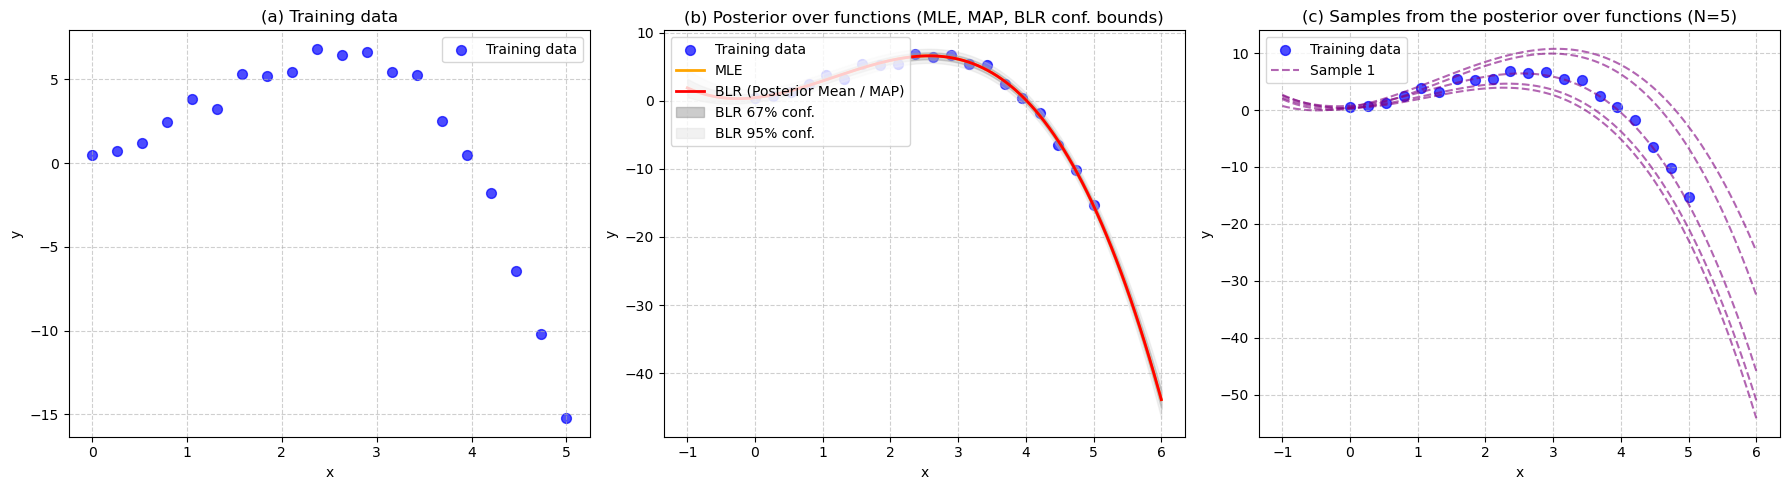

Plots generated. (Requires matplotlib to be installed and run in an environment that can display plots, e.g., Jupyter Notebook).


In [8]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np # Using numpy for easier array operations for plotting, though core logic remains pure Python

# --- Core Python Basic Math and Linear Algebra Helpers (as previously defined) ---

def custom_normal_sampler(mean, std, size=1):
    if std < 0: raise ValueError("Standard deviation cannot be negative.")
    samples = []
    i = 0
    while i < size:
        u1 = random.random()
        u2 = random.random()
        z0 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        samples.append(z0 * std + mean)
        i += 1
    if size == 1: return samples[0]
    return samples

def create_vector(size, value=0.0):
    return [value] * size

def create_matrix(rows, cols, value=0.0):
    return [[value for _ in range(cols)] for _ in range(rows)]

def matrix_transpose(matrix):
    if not matrix or not matrix[0]: return []
    rows, cols = len(matrix), len(matrix[0])
    transposed = create_matrix(cols, rows)
    for i in range(rows):
        for j in range(cols):
            transposed[j][i] = matrix[i][j]
    return transposed

def matrix_multiply(matrix_a, matrix_b):
    if not matrix_a or not matrix_b: return []

    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    
    is_vector_b = not isinstance(matrix_b[0], list)
    if is_vector_b:
        rows_b, cols_b = len(matrix_b), 1
        matrix_b_as_matrix = [[x] for x in matrix_b]
    else:
        rows_b, cols_b = len(matrix_b), len(matrix_b[0])
        matrix_b_as_matrix = matrix_b

    if cols_a != rows_b:
        raise ValueError(f"Matrix dimensions incompatible for multiplication: ({rows_a},{cols_a}) @ ({rows_b},{cols_b})")

    result = create_matrix(rows_a, cols_b)
    for i in range(rows_a):
        for j in range(cols_b):
            sum_val = 0.0
            for k in range(cols_a):
                sum_val += matrix_a[i][k] * matrix_b_as_matrix[k][j]
            result[i][j] = sum_val
            
    if is_vector_b: 
        return [row[0] for row in result]
    return result

def vector_add(v1, v2):
    if len(v1) != len(v2): raise ValueError("Vectors must have the same length.")
    return [v1[i] + v2[i] for i in range(len(v1))]

def scalar_multiply_vector(scalar, v):
    return [scalar * x for x in v]

def scalar_matrix_multiply(scalar, matrix):
    rows, cols = len(matrix), len(matrix[0])
    result = create_matrix(rows, cols)
    for i in range(rows):
        for j in range(cols):
            result[i][j] = scalar * matrix[i][j]
    return result

def matrix_add(matrix_a, matrix_b):
    rows_a, cols_a = len(matrix_a), len(matrix_a[0])
    rows_b, cols_b = len(matrix_b), len(matrix_b[0])
    if rows_a != rows_b or cols_a != cols_b:
        raise ValueError("Matrices must have the same dimensions for addition.")
    
    result = create_matrix(rows_a, cols_a)
    for i in range(rows_a):
        for j in range(cols_a):
            result[i][j] = matrix_a[i][j] + matrix_b[i][j]
    return result

def get_identity_matrix(size):
    mat = create_matrix(size, size)
    for i in range(size):
        mat[i][i] = 1.0
    return mat

def inverse_matrix_gauss_jordan(matrix):
    n = len(matrix)
    if any(len(row) != n for row in matrix):
        raise ValueError("Matrix must be square.")

    augmented_matrix = create_matrix(n, 2 * n)
    for i in range(n):
        for j in range(n):
            augmented_matrix[i][j] = matrix[i][j]
        augmented_matrix[i][i + n] = 1.0

    for i in range(n):
        max_row = i
        for k in range(i + 1, n):
            if abs(augmented_matrix[k][i]) > abs(augmented_matrix[max_row][i]):
                max_row = k
        augmented_matrix[i], augmented_matrix[max_row] = augmented_matrix[max_row], augmented_matrix[i]

        pivot = augmented_matrix[i][i]
        if abs(pivot) < 1e-9:
            raise ValueError("Matrix is singular or nearly singular, cannot be inverted.")

        for j in range(2 * n):
            augmented_matrix[i][j] /= pivot

        for k in range(n):
            if k != i:
                factor = augmented_matrix[k][i]
                for j in range(2 * n):
                    augmented_matrix[k][j] -= factor * augmented_matrix[i][j]

    inverse = create_matrix(n, n)
    for i in range(n):
        for j in range(n):
            inverse[i][j] = augmented_matrix[i][j + n]
    return inverse

# --- Polynomial Basis Function ---

def polynomial_basis_function(x, degree):
    return [x**j for j in range(degree + 1)]

# --- Maximum Likelihood Estimation (MLE) for Linear Regression ---

class MaximumLikelihoodLinearRegression:
    def __init__(self, degree):
        self.degree = degree
        self.coefficients = None

    def _build_design_matrix(self, X):
        Phi = create_matrix(len(X), self.degree + 1)
        for i, x_val in enumerate(X):
            Phi[i] = polynomial_basis_function(x_val, self.degree)
        return Phi

    def fit(self, X, Y):
        if len(X) != len(Y):
            raise ValueError("X and Y must have the same number of samples.")

        Phi = self._build_design_matrix(X)
        Phi_T = matrix_transpose(Phi)
        phi_t_phi = matrix_multiply(Phi_T, Phi)
        
        try:
            phi_t_phi_inv = inverse_matrix_gauss_jordan(phi_t_phi)
        except ValueError as e:
            raise ValueError(f"Could not compute MLE coefficients: {e}. (Phi^T @ Phi) might be singular or ill-conditioned.")

        phi_t_y = matrix_multiply(Phi_T, Y)
        self.coefficients = matrix_multiply(phi_t_phi_inv, phi_t_y)
        
    def predict(self, X_test):
        if self.coefficients is None:
            raise ValueError("Model not fitted. Call .fit() first.")
        
        # X_test can be a single value or a list
        if not isinstance(X_test, list):
            X_test = [X_test]
        
        predictions = []
        for x_val in X_test:
            phi_x = polynomial_basis_function(x_val, self.degree)
            pred_val = sum(phi_x[i] * self.coefficients[i] for i in range(len(phi_x)))
            predictions.append(pred_val)
        return predictions if len(predictions) > 1 else predictions[0]

# --- Bayesian Linear Regression (Reusing from previous) ---

class BayesianLinearRegression:
    def __init__(self, degree, noise_variance, prior_mean, prior_covariance):
        self.degree = degree
        self.noise_variance = noise_variance
        self.prior_mean = prior_mean
        self.prior_covariance = prior_covariance
            
        expected_theta_dim = self.degree + 1
        if len(self.prior_mean) != expected_theta_dim:
            raise ValueError(f"Prior mean must have dimension {expected_theta_dim} (degree + 1).")
        if len(self.prior_covariance) != expected_theta_dim or \
           any(len(row) != expected_theta_dim for row in self.prior_covariance):
            raise ValueError(f"Prior covariance must be a {expected_theta_dim}x{expected_theta_dim} matrix.")
            
        self.posterior_mean = None
        self.posterior_covariance = None

    def _build_design_matrix(self, X):
        Phi = create_matrix(len(X), self.degree + 1)
        for i, x_val in enumerate(X):
            Phi[i] = polynomial_basis_function(x_val, self.degree)
        return Phi

    def fit(self, X, Y):
        Phi = self._build_design_matrix(X)
        
        s0_inverse = inverse_matrix_gauss_jordan(self.prior_covariance)

        phi_t = matrix_transpose(Phi)
        phi_t_phi = matrix_multiply(phi_t, Phi)
        scaled_phi_t_phi = scalar_matrix_multiply(1.0 / self.noise_variance, phi_t_phi)
        
        s_n_inverse = matrix_add(s0_inverse, scaled_phi_t_phi)
        
        self.posterior_covariance = inverse_matrix_gauss_jordan(s_n_inverse)
        
        s0_inverse_m0 = matrix_multiply(s0_inverse, self.prior_mean)
        
        phi_t_y = matrix_multiply(phi_t, Y)
        scaled_phi_t_y = scalar_multiply_vector(1.0 / self.noise_variance, phi_t_y)
        
        sum_term = vector_add(s0_inverse_m0, scaled_phi_t_y)
        
        self.posterior_mean = matrix_multiply(self.posterior_covariance, sum_term)

    def posterior_predictive_distribution_noisy(self, x_star):
        if self.posterior_mean is None or self.posterior_covariance is None:
            raise ValueError("Model not fitted. Call .fit() first.")
        
        phi_x_star = polynomial_basis_function(x_star, self.degree)
        
        pred_mean = sum(phi_x_star[i] * self.posterior_mean[i] for i in range(len(phi_x_star)))
        
        phi_t_sn = matrix_multiply([phi_x_star], self.posterior_covariance)
        phi_t_sn_phi = matrix_multiply(phi_t_sn, [[p] for p in phi_x_star])[0][0]
        
        pred_variance = phi_t_sn_phi + self.noise_variance # Includes observation noise
        
        return pred_mean, pred_variance

    def noise_free_function_moments(self, x_star):
        if self.posterior_mean is None or self.posterior_covariance is None:
            raise ValueError("Model not fitted. Call .fit() first.")
            
        phi_x_star = polynomial_basis_function(x_star, self.degree)
        
        func_mean = sum(phi_x_star[i] * self.posterior_mean[i] for i in range(len(phi_x_star)))
        
        phi_t_sn = matrix_multiply([phi_x_star], self.posterior_covariance)
        func_variance = matrix_multiply(phi_t_sn, [[p] for p in phi_x_star])[0][0]
        
        return func_mean, func_variance

    def sample_functions_from_posterior(self, num_samples, x_values_for_plotting):
        if self.posterior_mean is None or self.posterior_covariance is None:
            raise ValueError("Model not fitted. Call .fit() first.")

        # Approximation: Sample each component independently from marginal Gaussian.
        # For true multivariate Gaussian sampling, Cholesky decomposition of S_N is required.
        theta_dim = len(self.posterior_mean)
        theta_samples = []
        for _ in range(num_samples):
            theta_sample_vec = create_vector(theta_dim)
            for d in range(theta_dim):
                theta_sample_vec[d] = custom_normal_sampler(
                    self.posterior_mean[d],
                    math.sqrt(max(1e-9, self.posterior_covariance[d][d])) # Using diagonal as variance
                )
            theta_samples.append(theta_sample_vec)

        function_realizations = []
        for theta_s in theta_samples:
            current_function_values = []
            for x_val in x_values_for_plotting:
                phi_x = polynomial_basis_function(x_val, self.degree)
                f_x = sum(theta_s[i] * phi_x[i] for i in range(theta_dim))
                current_function_values.append(f_x)
            function_realizations.append(current_function_values)
            
        return function_realizations


# --- Plotting Function ---

def plot_bayesian_linear_regression_results(
    X_train, Y_train, true_coeffs, true_degree, true_noise_std,
    mle_model, blr_model,
    x_plot_min, x_plot_max, num_plot_points=200, num_func_samples=5
):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    x_plot = np.linspace(x_plot_min, x_plot_max, num_plot_points).tolist()

    # --- Panel (a): Training Data ---
    ax = axes[0]
    ax.scatter(X_train, Y_train, color='blue', label='Training data', s=50, alpha=0.7)
    ax.set_title('(a) Training data')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

    # Calculate true function for plotting
    true_y_plot = [sum(true_coeffs[j] * (x**j) for j in range(true_degree + 1)) for x in x_plot]

    # --- Panel (b): Posterior over functions (mean and uncertainty) ---
    ax = axes[1]
    ax.scatter(X_train, Y_train, color='blue', label='Training data', s=50, alpha=0.7)
    
    # MLE Prediction
    mle_y_plot = mle_model.predict(x_plot)
    ax.plot(x_plot, mle_y_plot, color='orange', linestyle='-', label='MLE', linewidth=2)

    # BLR Posterior Mean (MAP)
    blr_mean_y_plot = []
    blr_pred_std_plot = []
    for x_val in x_plot:
        mean, variance = blr_model.posterior_predictive_distribution_noisy(x_val)
        blr_mean_y_plot.append(mean)
        blr_pred_std_plot.append(math.sqrt(variance))
    
    ax.plot(x_plot, blr_mean_y_plot, color='red', linestyle='-', label='BLR (Posterior Mean / MAP)', linewidth=2)

    # 95% and 67% Predictive Confidence Bounds (shaded)
    # Using 1.96 for 95% and ~0.97 for 67% (from Z-score for N(0,1))
    # For a standard normal, P(-0.967 < Z < 0.967) = 0.67
    # For a standard normal, P(-1.96 < Z < 1.96) = 0.95
    
    # Darker shade (67%)
    lower_67 = [m - 0.967 * s for m, s in zip(blr_mean_y_plot, blr_pred_std_plot)]
    upper_67 = [m + 0.967 * s for m, s in zip(blr_mean_y_plot, blr_pred_std_plot)]
    ax.fill_between(x_plot, lower_67, upper_67, color='gray', alpha=0.4, label='BLR 67% conf.')

    # Lighter shade (95%)
    lower_95 = [m - 1.96 * s for m, s in zip(blr_mean_y_plot, blr_pred_std_plot)]
    upper_95 = [m + 1.96 * s for m, s in zip(blr_mean_y_plot, blr_pred_std_plot)]
    ax.fill_between(x_plot, lower_95, upper_95, color='lightgray', alpha=0.3, label='BLR 95% conf.')
    
    ax.set_title('(b) Posterior over functions (MLE, MAP, BLR conf. bounds)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.6)

    # --- Panel (c): Samples from the posterior over functions ---
    ax = axes[2]
    ax.scatter(X_train, Y_train, color='blue', label='Training data', s=50, alpha=0.7)

    # Sample functions from BLR posterior
    sampled_functions = blr_model.sample_functions_from_posterior(num_func_samples, x_plot)
    for i, func_vals in enumerate(sampled_functions):
        ax.plot(x_plot, func_vals, color='purple', linestyle='--', alpha=0.6, label=f'Sample {i+1}' if i == 0 else "")
    
    ax.set_title(f'(c) Samples from the posterior over functions (N={num_func_samples})')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# --- Main Demo Execution ---

if __name__ == "__main__":
    random.seed(42) # For reproducibility
    np.random.seed(42) # For numpy random if used elsewhere, though not in core logic

    # 1. Generate Synthetic Data
    true_degree = 3
    true_coeffs = [0.0, 2.0, 1.5, -0.5] # y = 0 + 2x + 1.5x^2 - 0.5x^3
    true_noise_std = 0.5
    num_data_points = 20

    X_train = [i / (num_data_points - 1) * 5 for i in range(num_data_points)] # x from 0 to 5
    Y_train = []
    
    for x in X_train:
        true_f_x = sum(true_coeffs[j] * (x**j) for j in range(true_degree + 1))
        noisy_y = true_f_x + custom_normal_sampler(0, true_noise_std)
        Y_train.append(noisy_y)
    
    # 2. Define Model Parameters and Priors for BLR
    model_degree = 3 # Let's use the correct degree for estimation
    noise_variance = true_noise_std**2 # Assume known noise variance for this demo

    theta_dim = model_degree + 1
    prior_mean = create_vector(theta_dim, 0.0) # Zero mean prior
    
    alpha = 0.1 # Prior precision
    prior_covariance = get_identity_matrix(theta_dim)
    prior_covariance = scalar_matrix_multiply(1.0 / alpha, prior_covariance)
    
    # 3. Initialize and Fit MLE Model
    mle_model = MaximumLikelihoodLinearRegression(degree=model_degree)
    try:
        mle_model.fit(X_train, Y_train)
        print("MLE model fitted.")
    except ValueError as e:
        print(f"Error during MLE fitting: {e}")
        exit()

    # 4. Initialize and Fit Bayesian Linear Regression Model
    blr_model = BayesianLinearRegression(
        degree=model_degree,
        noise_variance=noise_variance,
        prior_mean=prior_mean,
        prior_covariance=prior_covariance
    )
    
    try:
        blr_model.fit(X_train, Y_train)
        print("BLR model fitted.")
    except ValueError as e:
        print(f"Error during BLR fitting: {e}")
        exit()

    # 5. Plot Results
    print("\nGenerating plots...")
    plot_bayesian_linear_regression_results(
        X_train, Y_train, true_coeffs, true_degree, true_noise_std,
        mle_model, blr_model,
        x_plot_min=-1.0, x_plot_max=6.0, # Extend plot range beyond training data for visualization
        num_func_samples=5 # Number of functions to sample for panel (c)
    )
    print("Plots generated. (Requires matplotlib to be installed and run in an environment that can display plots, e.g., Jupyter Notebook).")